# Optimasi Rute dan Operasional Transjakarta Berdasarkan Analisis Pola Penumpang Bulan April 2023

## Latar Belakang

Transportasi publik merupakan elemen penting dalam mendukung mobilitas masyarakat perkotaan sekaligus mengurangi tingkat kemacetan. Sebagai salah satu moda transportasi utama di DKI Jakarta, Transjakarta menghadapi tantangan dalam mengelola rute dan operasional akibat tingginya jumlah penumpang serta beragamnya pola perjalanan. Ketidakseimbangan distribusi armada, kepadatan pada jam sibuk, dan potensi keterlambatan layanan menjadi indikator perlunya strategi berbasis data untuk meningkatkan efisiensi.

Oleh karena itu, analisis pola penumpang pada bulan April 2023 dilakukan untuk mengidentifikasi tren penggunaan layanan, menentukan koridor dengan permintaan tinggi, serta menemukan peluang optimasi rute dan operasional. Melalui pendekatan data analytics, penelitian ini diharapkan mampu menghasilkan rekomendasi yang mendukung peningkatan kualitas layanan, efektivitas operasional, dan kenyamanan penumpang secara berkelanjutan.

## Rumusan Masalah

TransJakarta yang ingin mengoptimalkan perencanaan rute dan operasional berdasarkan permintaan penumpang. Berdasarkan rumusan masalah tersebut, dapat dirumuskan beberapa permasalahan utama:

1. Apakah terdapat pola dan fluktuasi permintaan penumpang TransJakarta dalam periode analisis bulan April 2023, baik secara harian maupun mingguan, serta faktor waktu apa saja yang memengaruhi perubahan volume penumpang tersebut?
2. Rute mana yang memiliki volume penumpang tertinggi dan terendah secara keseluruhan? Apakah terdapat rute tertentu yang secara konsisten mengalami permintaan penumpang tinggi sepanjang tahun?
3. Bagaimana pengaruh jenis kendaraan (BRT, mikrotrans, angkutan umum terintegrasi) terhadap jumlah penumpang?
4. Apakah terdapat rute yang mengalami pertumbuhan atau penurunan jumlah penumpang secara signifikan dibandingkan tahun-tahun sebelumnya? Bagaimana cara mengoptimalkan rute agar dapat melayani permintaan penumpang dengan lebih baik?
5. Apakah rute atau jenis kendaraan tertentu menarik demografi atau segmen penumpang tertentu? Adakah terdapat korelasi antara jumlah penumpang dengan faktor-faktor seperti hari dalam seminggu atau waktu dalam sehari?


# Data Sheet Information

Dataset Transjakarta ini berisikan 22 kolom yang menjelaskan informasi sebagai berikut:

| **Nama Kolom**       | **Deskripsi Kolom**                                                                          |
| -------------------- | -------------------------------------------------------------------------------------------- |
| **transID**          | ID transaksi unik untuk setiap transaksi.                                                    |
| **payCardID**        | Identitas utama pelanggan berupa kartu yang digunakan sebagai tiket saat tap in dan tap out. |
| **payCardBank**      | Nama bank penerbit kartu pelanggan.                                                          |
| **payCardName**      | Nama pelanggan yang tertera pada kartu.                                                      |
| **payCardSex**       | Jenis kelamin pelanggan yang tercantum pada kartu.                                           |
| **payCardBirthDate** | Tahun kelahiran pelanggan.                                                                   |
| **corridorID**       | ID koridor atau rute yang digunakan sebagai kunci pengelompokan rute.                        |
| **corridorName**     | Nama koridor atau rute yang mencakup titik awal dan akhir perjalanan.                        |
| **direction**        | Arah perjalanan rute: 0 untuk berangkat (go), 1 untuk kembali (back).                        |
| **tapInStops**       | ID halte tap in (masuk) untuk mengidentifikasi nama halte.                                   |
| **tapInStopsName**   | Nama halte tempat pelanggan melakukan tap in (masuk).                                        |
| **tapInStopsLat**    | Koordinat lintang (latitude) dari halte tap in.                                              |
| **tapInStopsLon**    | Koordinat bujur (longitude) dari halte tap in.                                               |
| **stopStartSeq**     | Urutan halte awal (halte ke-1, ke-2, dan seterusnya) sesuai dengan arah rute.                |
| **tapInTime**        | Waktu pelanggan melakukan tap in (tanggal dan jam).                                          |
| **tapOutStops**      | ID halte tap out (keluar) untuk mengidentifikasi nama halte.                                 |
| **tapOutStopsName**  | Nama halte tempat pelanggan melakukan tap out (keluar).                                      |
| **tapOutStopsLat**   | Koordinat lintang (latitude) dari halte tap out.                                             |
| **tapOutStopsLon**   | Koordinat bujur (longitude) dari halte tap out.                                              |
| **stopEndSeq**       | Urutan halte akhir sesuai dengan arah rute.                                                  |
| **tapOutTime**       | Waktu pelanggan melakukan tap out (tanggal dan jam).                                         |
| **payAmount**        | Jumlah tarif yang dibayarkan pelanggan (beberapa perjalanan gratis, sebagian berbayar).      |

## 1. Import Package

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

In [159]:
# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2.Read Data

In [160]:
df=pd.read_csv("Transjakarta.csv")
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


## 3. Data Understanding & Cleaning

Sebelum memasuki tahap analisis, penting untuk memahami dataset secara menyeluruh melalui proses data understanding. Tahap ini bertujuan untuk mengenali struktur data, mengidentifikasi potensi anomali, serta menemukan permasalahan yang perlu ditangani pada proses data cleaning.

Dengan memahami kondisi data sejak awal, kita dapat memastikan bahwa analisis yang dilakukan nantinya didasarkan pada data yang valid dan dapat dipercaya. Setiap anomali yang ditemukan akan ditangani dengan pendekatan yang terukur, disertai justifikasi yang jelas, baik berdasarkan domain knowledge maupun pertimbangan statistik.

Sebagai langkah awal dalam proses data understanding, kita akan mengeksplorasi informasi yang pada dataset TransJakarta untuk melihat apakah terdapat nilai yang tidak wajar atau berpotensi memengaruhi hasil analisis.

### Cek type data

In [161]:
## Cek type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

Jumlah baris dan kolom dalam dataset Transjakarta adalah:

- Baris: 37,900 entries

- Kolom: 22 column

### Informasi statistik deskriptif

In [162]:
## Informasi statistik deskriptif pada Dataset
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


### Cek data unique

In [163]:
## Cek Unique
pd.set_option('display.max_colwidth', None)
# Cek data unique di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

df_unique = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
df_unique

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara umum, dapat diketahui bahwa:

* Dataset TransJakarta terdiri dari 22 kolom dan 37.900 baris, yang merepresentasikan data transaksi perjalanan penumpang.

* Sebagian besar kolom memiliki data yang lengkap.

* Kolom waktu masih bertipe object, sehingga perlu dikonversi ke format datetime agar dapat digunakan untuk analisis berbasis waktu.

* `transID` memiliki jumlah unique yang sama dengan jumlah baris, sehingga dapat dianggap sebagai primary key dan tidak mengandung duplikasi.

* `payCardID` memiliki sekitar 2.000 nilai unik, yang mengindikasikan bahwa satu kartu dapat digunakan untuk beberapa perjalanan.

* Nilai pembayaran didominasi oleh Rp3.500, yang kemungkinan merupakan tarif standar TransJakarta.

### Cek Duplikat & Missing Value

In [164]:
## Cek Duplikat
duplicate_trans = df[df.duplicated(subset='transID', keep=False)]
duplicate_trans.shape

(0, 22)

In [165]:
## Cek Missing Value

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_percentage

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

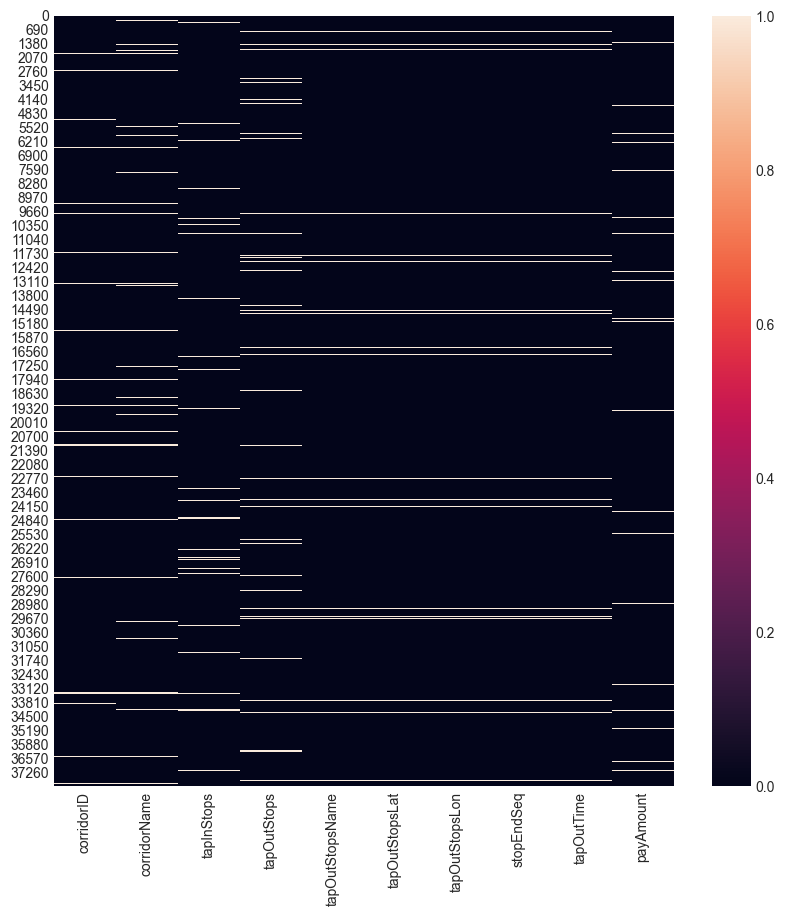

In [166]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq', 'tapOutTime', 'payAmount']].isna())

Dari hasil Analisis Missing Values, didapatkan informasi:

1. Kategori 1: Missing Rendah (<5%) - Bisa diimpute
    - corridorID (3.31%) - ID koridor

    - corridorName (5.09%) - Nama koridor

    - tapInStops (3.20%) - Halte boarding

    - payAmount (2.66%) - Nilai pembayaran

2. Kategori 2: Missing Sedang (5-10%) - Perlu handling khusus
    - tapOutStops (6.04%) - Halte turun

    - tapOutStopsName (3.54%) - Nama halte turun

    - tapOutStopsLat/Lon (3.54%) - Koordinat halte turun

    - stopEndSeq (3.54%) - Urutan halte akhir

    - tapOutTime (3.54%) - Waktu tap out

1. <b>Menghapus Data (Dropping)</b>

Pendekatan ini dilakukan dengan menghapus baris atau kolom yang memiliki nilai kosong. Namun, metode ini perlu digunakan secara hati-hati karena berpotensi mengurangi jumlah data secara signifikan dan menyebabkan hilangnya informasi penting.

Pada dataset ini, mayoritas missing values berada di bawah 10%, sehingga penghapusan data secara langsung bukan menjadi pilihan utama — terutama jika kolom tersebut masih dapat dipulihkan melalui proses imputasi.

2. <b>Mengisi Data yang Hilang (Imputation)</b>

Pendekatan ini lebih disarankan karena memungkinkan kita mempertahankan sebanyak mungkin data. Prinsip utamanya adalah mengisi nilai kosong dengan data yang paling mendekati kondisi sebenarnya.

### Handling Missing Values

Pada tahap ini, saya melakukan proses pembersihan dan standarisasi `corridorID` dan `corridorName`, karena dua kolom ini sangat krusial untuk analisis rute Transjakarta.

Langkah pertama, saya mengecek apakah ada satu `corridorName` yang memiliki lebih dari satu `corridorID`. Ini penting karena kondisi seperti ini bisa menyebabkan analisis rute menjadi bias atau terduplikasi. Setelah itu, saya melakukan normalisasi `corridorID`, khususnya untuk layanan malam yang menggunakan prefix M. Prefix ini saya hilangkan agar rute malam dan rute reguler bisa dianalisis sebagai satu koridor yang sama.”

Selanjutnya, saya membuat mapping yang konsisten antara `corridorID` dan `corridorName`. Untuk setiap koridor, saya memilih pasangan yang paling sering muncul di data, sehingga mapping yang digunakan benar-benar merepresentasikan kondisi aktual.

In [167]:
# 1. CLEAN CORRIDORID & CORRIDORNAME
print("\nCleaning corridorID dan corridorName...")

# A. Cek hubungan antara corridorID dan corridorName
corridorID_count = df.groupby('corridorName')['corridorID'].nunique().sort_values(ascending=False)
conflict_corridors = corridorID_count[corridorID_count > 1]

print(f"Jumlah corridorName dengan multiple corridorID: {len(conflict_corridors)}")
if len(conflict_corridors) > 0:
    print("Contoh konflik:")
    for corridor, count in conflict_corridors.head().items():
        print(f"  - {corridor}: {count} corridorID berbeda")

# B. Normalisasi corridorID (hilangkan prefix 'M' untuk night service)
print("\nNormalisasi corridorID (remove 'M' prefix)...")
df['corridorID_original'] = df['corridorID']  # Simpan original

# Mapping untuk normalize 'M' prefix (night service)
m_mapping = {
    'M1': '1', 'M2': '2', 'M3': '3', 'M5': '5', 'M9': '9',
    'M1H': '1H', 'M7': '7', 'M10': '10', 'M11': '11'
}

def normalize_corridorID(corridor_id):
    if pd.isna(corridor_id):
        return corridor_id
    corridor_str = str(corridor_id)
    return m_mapping.get(corridor_str, corridor_str)

df['corridorID'] = df['corridorID'].apply(normalize_corridorID)

# C. Create consistent mapping antara corridorID dan corridorName
print("\nMembuat mapping konsisten corridorID ↔ corridorName...")

# Ambil mapping dari data yang sudah bersih (tanpa conflict)
clean_mapping = df[['corridorID', 'corridorName']].dropna().drop_duplicates()

# Untuk setiap corridorID, pilih corridorName yang paling sering muncul
id_to_name = clean_mapping.groupby('corridorID')['corridorName'].agg(
    lambda x: x.mode()[0] if len(x.mode()) > 0 else None
).to_dict()

# Untuk setiap corridorName, pilih corridorID yang paling sering muncul
name_to_id = clean_mapping.groupby('corridorName')['corridorID'].agg(
    lambda x: x.mode()[0] if len(x.mode()) > 0 else None
).to_dict()

# D. Fill missing values menggunakan mapping
print("Mengisi missing values menggunakan mapping...")

# Fill corridorName dari corridorID
mask_name_missing = df['corridorName'].isna()
df.loc[mask_name_missing, 'corridorName'] = df.loc[mask_name_missing, 'corridorID'].map(id_to_name)

# Fill corridorID dari corridorName
mask_id_missing = df['corridorID'].isna()
df.loc[mask_id_missing, 'corridorID'] = df.loc[mask_id_missing, 'corridorName'].map(name_to_id)

# E. Drop sisa yang masih null
initial_count = len(df)
df = df.dropna(subset=['corridorID', 'corridorName'])
dropped_count = initial_count - len(df)
print(f"Dropped {dropped_count} rows dengan corridorID/corridorName masih null")

print(f"✓ corridorID null: {df['corridorID'].isna().sum()}")
print(f"✓ corridorName null: {df['corridorName'].isna().sum()}")


Cleaning corridorID dan corridorName...
Jumlah corridorName dengan multiple corridorID: 5
Contoh konflik:
  - Blok M - Kota: 2 corridorID berbeda
  - Kalideres - Bundaran HI via Veteran: 2 corridorID berbeda
  - Pinang Ranti - Pluit: 2 corridorID berbeda
  - Matraman Baru - Ancol: 2 corridorID berbeda
  - Pulo Gadung - Monas: 2 corridorID berbeda

Normalisasi corridorID (remove 'M' prefix)...

Membuat mapping konsisten corridorID ↔ corridorName...
Mengisi missing values menggunakan mapping...
Dropped 1125 rows dengan corridorID/corridorName masih null
✓ corridorID null: 0
✓ corridorName null: 0


Kemudian, saya mengidentifikasi tipe layanan Transjakarta karena di data mentah belum ada label service type yang konsisten.

Saya menggunakan domain knowledge, terutama dari `payAmount` untuk membedakan BRT, Royaltrans, dan Mikrotrans. Untuk layanan yang tidak bisa dibedakan dari tarif, saya klasifikasikan berdasarkan `corridorID`, seperti angkutan pengumpan dan layanan wisata.

Setelah itu, saya standarisasi data waktu, menghitung durasi perjalanan, dan memfilter durasi yang tidak masuk akal agar analisis tidak bias.

In [168]:
# IDENTIFIKASI SERVICE TYPE BERDASARKAN DATA
print("\nIdentifikasi Service Type berdasarkan data...")

# A. Service Type berdasarkan payAmount
print("Mengidentifikasi service type berdasarkan payAmount...")

def identify_service_type(row):
    """
    Identifikasi service type berdasarkan domain knowledge Transjakarta
    """
    # 1. Berdasarkan payAmount (tarif)
    if row['payAmount'] == 3500:
        return 'BRT'
    elif row['payAmount'] == 20000:
        return 'Royaltrans'
    elif row['payAmount'] == 0:
        return 'Mikrotrans'
    
    # 2. Berdasarkan corridorID (angkutan pengumpan/feeder)
    # List corridorID untuk angkutan pengumpan (dari domain knowledge)
    angkutanPengumpan_list = [
        "8K", "8E", "7Q", "6U", "7W", "7U", "7C", "7V", "7R", "7T", 
        "6Q", "6W", "2Q", "2B", "8D", "11Q", "5M", "5F", "7B", "7E", 
        "9E", "8N", "8C", "12A", "7A", "1M", "14A", "1A", "9H", "9D", 
        "6T", "6K", "4C", "1C", "4F", "12B", "7P", "1E", "4K", "2M", 
        "11D", "6N", "5N", "1Q", "1P", "6H", "1R", "2P", "3E", "12P", 
        "6C", "11W", "6M", "4B", "1F", "1B", "1H", "5B", "6D", "3D", 
        "1N", "8M", "14B", "7D"
    ]
    
    if str(row['corridorID']) in angkutanPengumpan_list:
        return 'Angkutan Pengumpan'
    
    # 3. Berdasarkan corridorID khusus (Wisata)
    if str(row['corridorID']) in ['BW9', 'JIS3', 'JIS']:
        return 'Wisata/Event'
    
    # 4. Default untuk yang tidak teridentifikasi
    return 'Layanan Reguler'

# Terapkan fungsi
df['serviceType'] = df.apply(identify_service_type, axis=1)

# Cek distribusi
print("\nDistribusi Service Type:")
print("-" * 40)
service_counts = df['serviceType'].value_counts()
for service, count in service_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{service}: {count:,} ({percentage:.1f}%)")

# CONVERT TYPE & CALCULATE
print("\nConvert Type & Calculate...")

# A. Convert datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# B. Hitung travel duration
df['travel_duration'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# C. Filter invalid durations
invalid_duration = df[(df['travel_duration'] <= 0) | (df['travel_duration'] > 180)].shape[0]
df = df[(df['travel_duration'] > 0) & (df['travel_duration'] <= 180)]
print(f"Dropped {invalid_duration} rows dengan durasi tidak valid")

# D. Filter hanya April 2023
initial_count = len(df)
df = df[(df['tapInTime'].dt.year == 2023) & (df['tapInTime'].dt.month == 4)]
print(f"Data hanya April 2023: {len(df):,} rows ({len(df)/initial_count*100:.1f}%)")

# E. Hitung usia
df['age'] = 2023 - df['payCardBirthDate']
df = df[(df['age'] >= 10) & (df['age'] <= 80)]

print(f"\n✓ Data final: {len(df):,} rows")
print(f"✓ Columns: {len(df.columns)}")


Identifikasi Service Type berdasarkan data...
Mengidentifikasi service type berdasarkan payAmount...

Distribusi Service Type:
----------------------------------------
BRT: 17,944 (48.8%)
Mikrotrans: 16,151 (43.9%)
Royaltrans: 1,701 (4.6%)
Layanan Reguler: 808 (2.2%)
Angkutan Pengumpan: 171 (0.5%)

Convert Type & Calculate...
Dropped 0 rows dengan durasi tidak valid
Data hanya April 2023: 35,478 rows (100.0%)

✓ Data final: 35,478 rows
✓ Columns: 26


Dari sini kita lihat bahwa perjalanan Transjakarta sangat didominasi oleh BRT dan Mikrotrans, sementara layanan premium dan pendukung porsinya relatif kecil.

In [169]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,travel_duration,age
count,3.547800e+04,35478.000000,35478.000000,35478.000000,35478.000000,35478.000000,35478,35478.000000,35478.000000,35478.000000,35478,34537.000000,35478.000000,35478.000000
mean,4.233600e+17,1990.138706,0.500620,-6.214865,106.841544,13.543548,2023-04-16 08:06:47.795055872,-6.214660,106.841230,21.196883,2023-04-16 09:18:59.164750080,2707.690303,72.189495,32.861294
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000,15.000000,11.000000
25%,1.800407e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,2023-04-10 09:03:39.750000128,-6.247225,106.801640,11.000000,2023-04-10 10:18:08,0.000000,51.150000,22.000000
50%,3.507503e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,2023-04-16 17:38:01.500000,-6.214787,106.834580,18.000000,2023-04-16 18:57:45,3500.000000,71.950000,33.000000
75%,4.693230e+15,2001.000000,1.000000,-6.175528,106.882620,19.000000,2023-04-21 21:43:07.750000128,-6.174736,106.883400,29.000000,2023-04-21 23:14:56.500000,3500.000000,95.800000,41.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,2023-04-30 21:55:41,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,20000.000000,179.050000,77.000000
std,1.319496e+18,13.034972,0.500007,0.057870,0.060396,12.200316,NaN,0.059025,0.061045,13.786118,NaN,4227.685829,28.059819,13.034972


Dari informasi yang didapat, dataset transjakarta yang ada hanya bulan April 2023

### Create Feature

Setelah proses data cleaning selesai, tahap selanjutnya adalah melakukan feature engineering, yaitu proses membuat variabel baru dari data yang sudah ada untuk memperkaya informasi dan mempermudah analisis. Di sini saya membuat fitur turunan berbasis waktu, usia, dan durasi perjalanan, termasuk identifikasi jam sibuk dan periode Ramadan, agar pola mobilitas penumpang bisa dianalisis lebih kontekstual.

In [170]:
print("FEATURE ENGINEERING")
# 1. Time-based features
print("1. Ekstrak fitur waktu...")
df['tapIn_hour'] = df['tapInTime'].dt.hour
df['tapIn_day'] = df['tapInTime'].dt.day
df['tapIn_dayofweek'] = df['tapInTime'].dt.dayofweek
df['tapIn_dayname'] = df['tapInTime'].dt.day_name()
df['tapIn_weekend'] = df['tapIn_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# 2. Categorize time of day
print("2. Kategorisasi waktu...")
def categorize_time(hour):
    if 4 <= hour < 7: return 'Dini Hari (4-6)'
    elif 7 <= hour < 10: return 'Puncak Pagi (7-9)'
    elif 10 <= hour < 15: return 'Siang (10-14)'
    elif 15 <= hour < 18: return 'Puncak Sore (15-17)'
    elif 18 <= hour < 22: return 'Malam (18-21)'
    else: return 'Tengah Malam (22-3)'

df['time_category'] = df['tapIn_hour'].apply(categorize_time)

# 3. Age categorization
print("3. Kategorisasi usia...")
def categorize_age(age):
    if age < 18: return 'Remaja (<18)'
    elif age < 25: return 'Muda (18-24)'
    elif age < 35: return 'Dewasa Awal (25-34)'
    elif age < 50: return 'Dewasa (35-49)'
    elif age < 60: return 'Pra-Pensiun (50-59)'
    else: return 'Senior (60+)'

df['age_group'] = df['age'].apply(categorize_age)

# 4. Week of April
print("4. Fitur April-specific...")
df['week_of_april'] = ((df['tapIn_day'] - 1) // 7) + 1

# 5. Peak hour identification 
print("5. Identifikasi jam sibuk...")
hourly_counts = df.groupby('tapIn_hour').size()
peak_threshold = hourly_counts.quantile(0.75)
df['is_peak_hour'] = df['tapIn_hour'].apply(lambda x: 1 if hourly_counts.get(x, 0) >= peak_threshold else 0)

# 6. Ramadan period
print("6. Identifikasi periode Ramadan...")
df['is_ramadan'] = df['tapIn_day'].apply(lambda x: 1 if 21 <= x <= 30 else 0)

# 7. Duration category
print("7. Kategorisasi durasi...")
def categorize_duration(duration):
    if duration <= 15: return 'Pendek (≤15 menit)'
    elif duration <= 30: return 'Menengah (16-30 menit)'
    elif duration <= 60: return 'Panjang (31-60 menit)'
    else: return 'Sangat Panjang (>60 menit)'

df['duration_category'] = df['travel_duration'].apply(categorize_duration)

print(f"\n✓ Feature engineering selesai")
print(f"✓ Total fitur: {len(df.columns)}")
print(f"✓ Sample fitur baru: {list(df.columns)[-10:]}")

FEATURE ENGINEERING
1. Ekstrak fitur waktu...
2. Kategorisasi waktu...
3. Kategorisasi usia...
4. Fitur April-specific...
5. Identifikasi jam sibuk...
6. Identifikasi periode Ramadan...
7. Kategorisasi durasi...

✓ Feature engineering selesai
✓ Total fitur: 37
✓ Sample fitur baru: ['tapIn_day', 'tapIn_dayofweek', 'tapIn_dayname', 'tapIn_weekend', 'time_category', 'age_group', 'week_of_april', 'is_peak_hour', 'is_ramadan', 'duration_category']


Fitur-fitur baru ini dirancang untuk mengubah data mentah menjadi variabel yang lebih mudah diinterpretasikan dalam konteks operasional dan bisnis.

In [171]:
## Cek Kembali Type Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35478 entries, 0 to 37899
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transID              35478 non-null  object        
 1   payCardID            35478 non-null  int64         
 2   payCardBank          35478 non-null  object        
 3   payCardName          35478 non-null  object        
 4   payCardSex           35478 non-null  object        
 5   payCardBirthDate     35478 non-null  int64         
 6   corridorID           35478 non-null  object        
 7   corridorName         35478 non-null  object        
 8   direction            35478 non-null  float64       
 9   tapInStops           34332 non-null  object        
 10  tapInStopsName       35478 non-null  object        
 11  tapInStopsLat        35478 non-null  float64       
 12  tapInStopsLon        35478 non-null  float64       
 13  stopStartSeq         35478 non-null 

## 4. Process Analyst

### ANALISIS 1: ANALISIS POLA HARIAN

In [172]:
# Data validation for analysis
print(f"\nDATA UNTUK ANALISIS 1:")
print("-" * 40)
print(f"Total transaksi: {len(df):,}")
print(f"Periode: {df['tapInTime'].min().date()} hingga {df['tapInTime'].max().date()}")
print(f"Hari dengan data: {df['tapIn_day'].nunique()} dari 30 hari")

# Hitung daily statistics
daily_stats = df.groupby('tapIn_day').agg({
    'transID': 'count',
    'travel_duration': 'mean',
    'payAmount': 'mean',
    'age': 'mean'
}).rename(columns={'transID': 'passenger_count'})



DATA UNTUK ANALISIS 1:
----------------------------------------
Total transaksi: 35,478
Periode: 2023-04-01 hingga 2023-04-30
Hari dengan data: 30 dari 30 hari


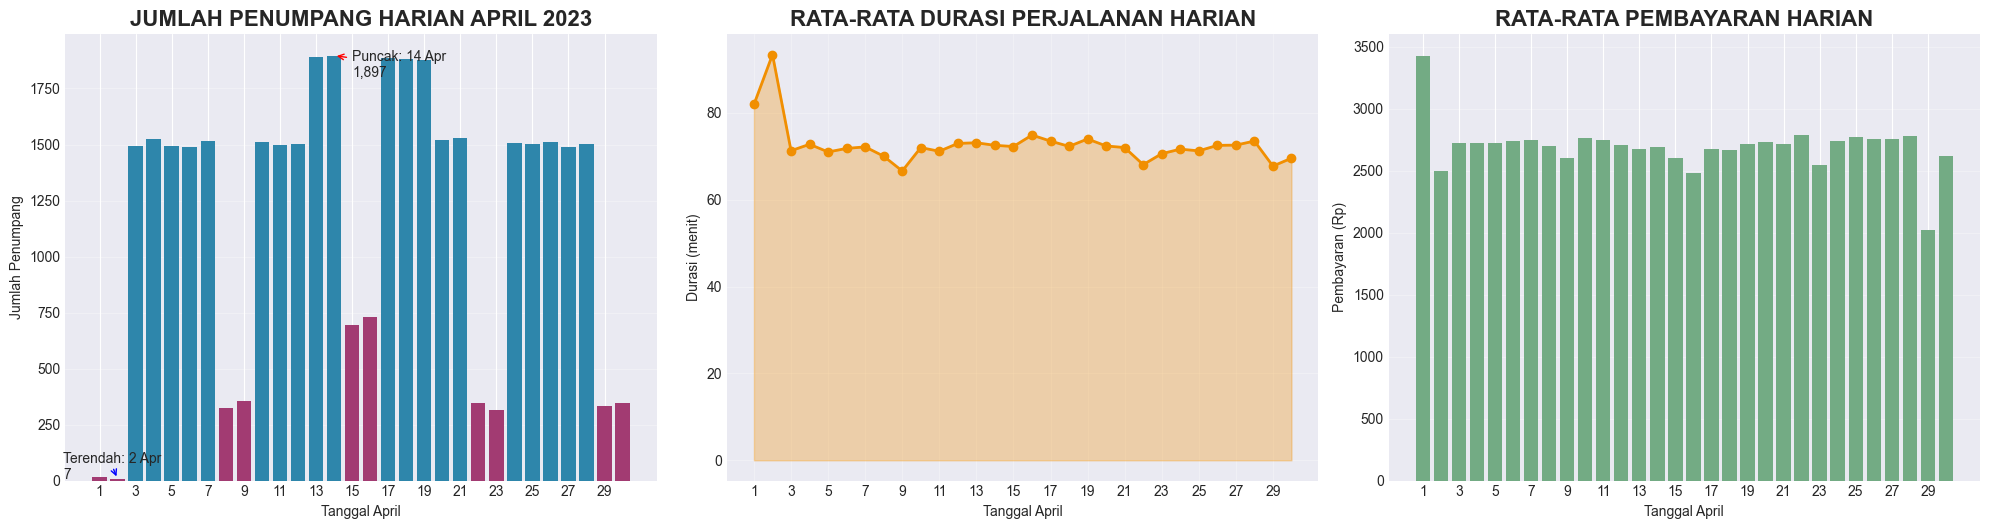

In [173]:
# 1. Trend Harian dengan Weekend Highlight
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
bars = plt.bar(daily_stats.index, daily_stats['passenger_count'], 
               color=['#2E86AB' if day not in [1, 2, 8, 9, 15, 16, 22, 23, 29, 30] 
                      else '#A23B72' for day in daily_stats.index])
plt.title('JUMLAH PENUMPANG HARIAN APRIL 2023', fontsize=16, fontweight='bold')
plt.xlabel('Tanggal April')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(1, 31, 2))
plt.grid(True, alpha=0.3, axis='y')

# Anotasi max dan min
max_day = daily_stats['passenger_count'].idxmax()
min_day = daily_stats['passenger_count'].idxmin()
plt.annotate(f'Puncak: {max_day} Apr\n{daily_stats.loc[max_day, "passenger_count"]:,}',
             xy=(max_day, daily_stats.loc[max_day, 'passenger_count']),
             xytext=(max_day+1, daily_stats.loc[max_day, 'passenger_count']*0.95),
             arrowprops=dict(arrowstyle='->', color='red'))

plt.annotate(f'Terendah: {min_day} Apr\n{daily_stats.loc[min_day, "passenger_count"]:,}',
             xy=(min_day, daily_stats.loc[min_day, 'passenger_count']),
             xytext=(min_day-3, daily_stats.loc[min_day, 'passenger_count']*1.1),
             arrowprops=dict(arrowstyle='->', color='blue'))

# 2. Rata-rata Durasi Harian
plt.subplot(3, 3, 2)
plt.plot(daily_stats.index, daily_stats['travel_duration'], 
         marker='o', color='#F18F01', linewidth=2)
plt.fill_between(daily_stats.index, daily_stats['travel_duration'], 
                 alpha=0.3, color='#F18F01')
plt.title('RATA-RATA DURASI PERJALANAN HARIAN', fontsize=16, fontweight='bold')
plt.xlabel('Tanggal April')
plt.ylabel('Durasi (menit)')
plt.xticks(range(1, 31, 2))
plt.grid(True, alpha=0.3)

# 3. Rata-rata Pembayaran Harian
plt.subplot(3, 3, 3)
plt.bar(daily_stats.index, daily_stats['payAmount'], color='#73AB84')
plt.title('RATA-RATA PEMBAYARAN HARIAN', fontsize=16, fontweight='bold')
plt.xlabel('Tanggal April')
plt.ylabel('Pembayaran (Rp)')
plt.xticks(range(1, 31, 2))
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

1. <b>Tren Jumlah Penumpang Harian</b>

    Grafik menunjukkan bahwa jumlah penumpang TransJakarta selama April cenderung stabil, dengan rata-rata sekitar 1.500–1.600 perjalanan per hari. Namun, terdapat lonjakan signifikan pada pertengahan bulan yang mendekati 2.000 penumpang, kemungkinan dipengaruhi oleh meningkatnya mobilitas masyarakat dan aktivitas kerja.

    Sebaliknya, beberapa hari mengalami penurunan tajam yang kemungkinan berkaitan dengan akhir pekan atau hari libur. Fluktuasi ini masih tergolong wajar dalam transportasi publik, tetapi tetap penting diperhatikan untuk membantu operator mengantisipasi kepadatan dan mengoptimalkan alokasi armada.

2. <b>Tren Rata-Rata Durasi Perjalanan Harian</b>

    Rata-rata durasi perjalanan berada pada kisaran 65–75 menit dengan variasi yang relatif kecil, menunjukkan bahwa layanan beroperasi secara konsisten dan waktu tempuh cukup dapat diprediksi.

    Terdapat sedikit peningkatan durasi pada awal bulan yang mungkin disebabkan oleh kemacetan atau faktor operasional, namun kondisi segera kembali stabil. Hal ini mengindikasikan bahwa sistem transportasi memiliki tingkat keandalan yang baik.

3. <b>Tren Rata-Rata Pembayaran Harian</b>

    Rata-rata pembayaran harian berada di kisaran Rp2.600–Rp2.800, mendekati tarif standar, yang menunjukkan bahwa mayoritas penumpang menggunakan layanan reguler.

    Terlihat adanya spike pada awal bulan serta penurunan tajam di akhir periode. Kondisi ini kemungkinan dipengaruhi oleh perubahan komposisi penumpang, peningkatan perjalanan bersubsidi, atau program tarif khusus. Meski demikian, secara keseluruhan struktur tarif terlihat stabil.

Text(0.5, 1.0, 'DISTRIBUSI KATEGORI WAKTU')

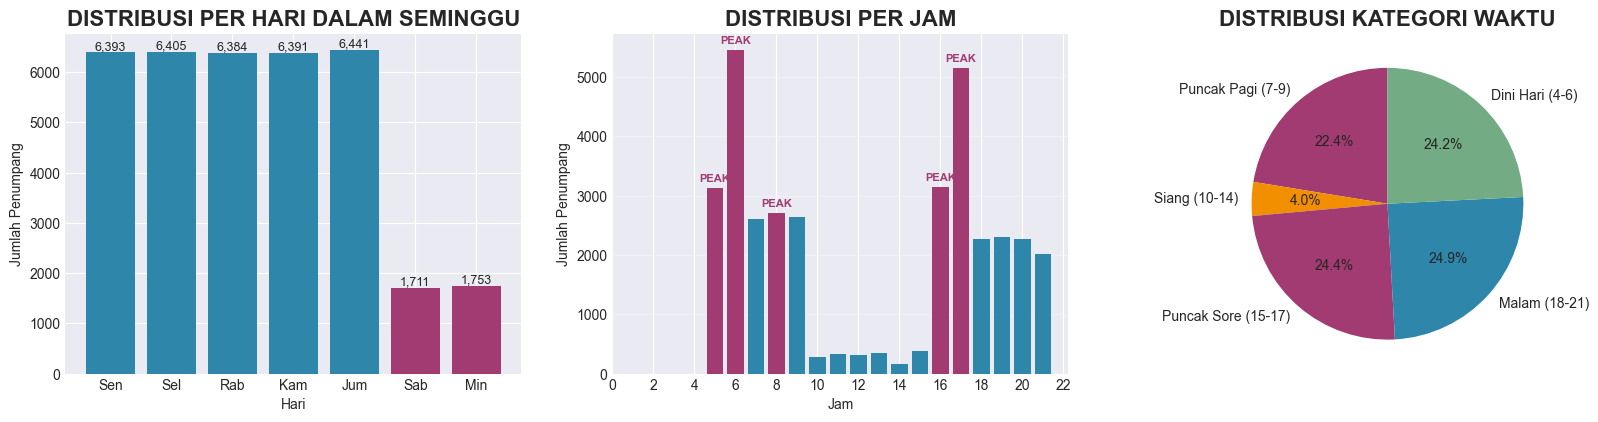

In [174]:
# 4. Distribusi Hari dalam Seminggu
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 4)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df.groupby('tapIn_dayname').size().reindex(day_order)
day_colors = ['#2E86AB', '#2E86AB', '#2E86AB', '#2E86AB', '#2E86AB', '#A23B72', '#A23B72']
bars = plt.bar(range(len(day_counts)), day_counts.values, color=day_colors)
plt.xticks(range(len(day_counts)), ['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.title('DISTRIBUSI PER HARI DALAM SEMINGGU', fontsize=16, fontweight='bold')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penumpang')
for i, v in enumerate(day_counts.values):
    plt.text(i, v + max(day_counts.values)*0.01, f'{v:,}', 
             ha='center', fontsize=9)

# 5. Distribusi Jam
plt.subplot(3, 3, 5)
hourly_counts = df.groupby('tapIn_hour').size()

# Identifikasi peak hours (misal: jam dengan penumpang > 75th percentile)
peak_threshold = hourly_counts.quantile(0.75)
peak_hours_list = hourly_counts[hourly_counts >= peak_threshold].index.tolist()

# Warna bars berdasarkan peak/non-peak
bar_colors = ['#A23B72' if hour in peak_hours_list else '#2E86AB' 
              for hour in hourly_counts.index]

plt.bar(hourly_counts.index, hourly_counts.values, color=bar_colors)
plt.title('DISTRIBUSI PER JAM', fontsize=16, fontweight='bold')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3, axis='y')

# Tambahkan annotasi untuk peak hours
for hour in peak_hours_list:
    if hour in hourly_counts.index:
        plt.text(hour, hourly_counts[hour] + max(hourly_counts.values)*0.02, 
                 'PEAK', ha='center', fontsize=8, fontweight='bold', color='#A23B72')

# 6. Kategori Waktu
plt.subplot(3, 3, 6)
time_cat_counts = df['time_category'].value_counts()
time_cat_order = ['Puncak Pagi (7-9)', 'Siang (10-14)', 'Puncak Sore (15-17)', 
                  'Malam (18-21)', 'Dini Hari (4-6)', 'Tengah Malam (22-3)']

# Reindex dan drop NaN
time_cat_counts = time_cat_counts.reindex(time_cat_order)
time_cat_counts = time_cat_counts.dropna()  # Hapus kategori yang tidak ada data

# Pastikan colors sesuai dengan data yang ada
colors_time = ['#A23B72', '#F18F01', '#A23B72', '#2E86AB', '#73AB84', '#73AB84']
# Ambil warna sesuai dengan kategori yang ada
colors_time_filtered = [colors_time[i] for i, cat in enumerate(time_cat_order) if cat in time_cat_counts]

plt.pie(time_cat_counts.values, labels=time_cat_counts.index, 
        colors=colors_time_filtered, autopct='%1.1f%%', startangle=90)
plt.title('DISTRIBUSI KATEGORI WAKTU', fontsize=16, fontweight='bold')

1. <b>Distribusi Penumpang per Hari dalam Seminggu</b>

    Grafik menunjukkan bahwa jumlah penumpang jauh lebih tinggi pada hari kerja (Senin–Jumat) dibandingkan akhir pekan. Volume penumpang pada hari kerja relatif konsisten, dengan selisih yang tidak terlalu besar antar hari.

    Sebaliknya, terjadi penurunan yang sangat signifikan pada Sabtu dan Minggu, di mana jumlah penumpang hanya sekitar seperempat dari hari kerja. Pola ini mengindikasikan bahwa layanan TransJakarta terutama digunakan untuk mobilitas rutin pada hari kerja, seperti aktivitas kerja dan sekolah.

2. <b>Distribusi Penumpang per Jam</b>

    Terlihat dua puncak utama jumlah penumpang, yaitu:

    - Pagi hari (sekitar pukul 05.00–07.00)

    - Sore hari (sekitar pukul 16.00–17.00)

    Pola ini mencerminkan jam sibuk komuter, ketika masyarakat melakukan perjalanan berangkat dan pulang dari aktivitas utama. Di luar jam-jam tersebut, terutama pada tengah hari, volume penumpang relatif lebih rendah dan stabil.

3. <b>Distribusi Kategori Waktu Perjalanan</b>

    Sebagian besar perjalanan terjadi pada:

    * Malam (18–21) dan Puncak Sore (15–17)

    * Diikuti oleh Dini Hari (4–6) dan Puncak Pagi (7–9)

    Sementara periode siang (10–14) memiliki proporsi paling kecil, menandakan bahwa mobilitas cenderung rendah di luar jam kerja utama.

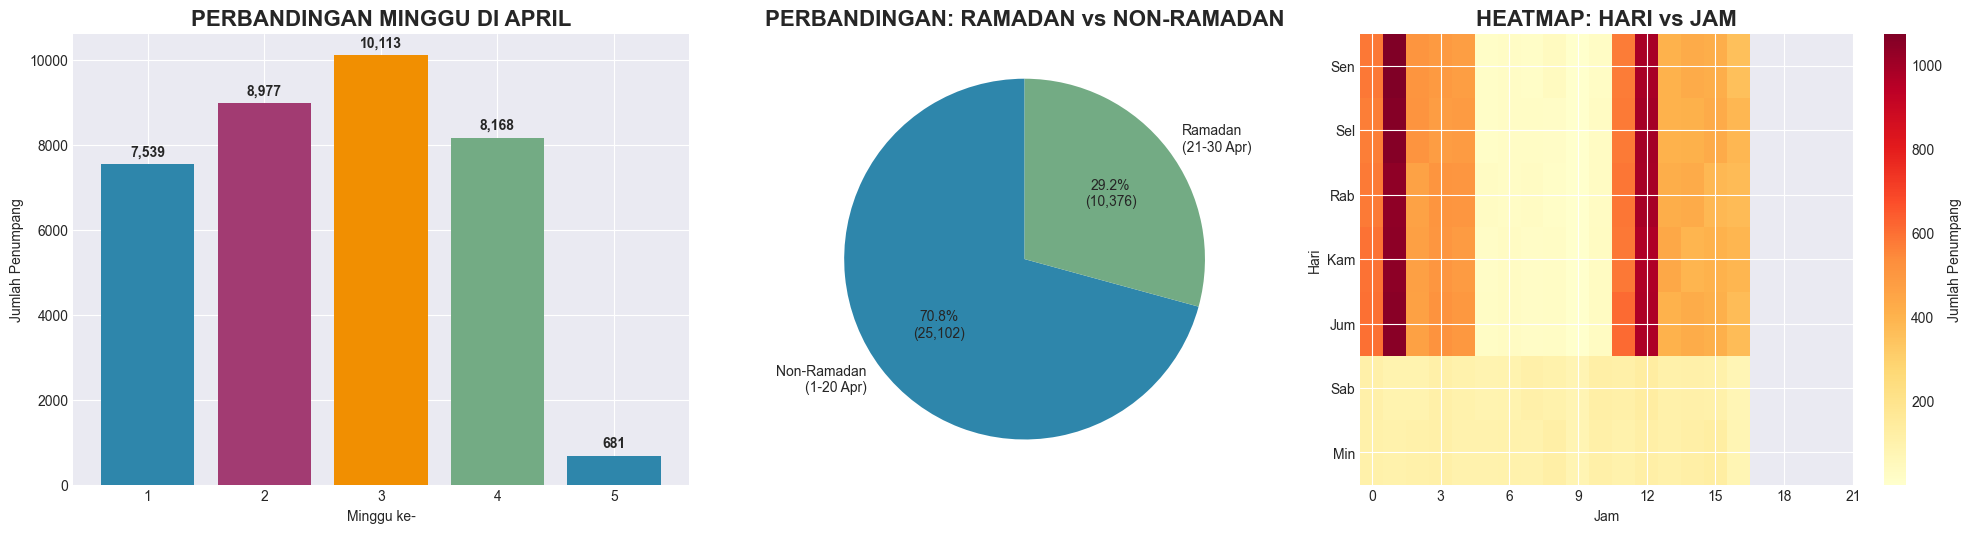

In [175]:
# 7. Perbandingan Minggu
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 7)
weekly_counts = df.groupby('week_of_april').size()
colors_week = ['#2E86AB', '#A23B72', '#F18F01', '#73AB84']
plt.bar(weekly_counts.index, weekly_counts.values, color=colors_week)
plt.title('PERBANDINGAN MINGGU DI APRIL', fontsize=16, fontweight='bold')
plt.xlabel('Minggu ke-')
plt.ylabel('Jumlah Penumpang')
for i, v in enumerate(weekly_counts.values):
    plt.text(i+1, v + max(weekly_counts.values)*0.02, f'{v:,}', 
             ha='center', fontsize=10, fontweight='bold')

# 8. Ramadan vs Non-Ramadan
plt.subplot(3, 3, 8)
ramadan_counts = df.groupby('is_ramadan').size()
labels_ramadan = ['Non-Ramadan\n(1-20 Apr)', 'Ramadan\n(21-30 Apr)']
colors_ramadan = ['#2E86AB', '#73AB84']
plt.pie(ramadan_counts.values, labels=labels_ramadan, colors=colors_ramadan,
        autopct=lambda p: f'{p:.1f}%\n({int(p*sum(ramadan_counts.values)/100):,})',
        startangle=90)
plt.title('PERBANDINGAN: RAMADAN vs NON-RAMADAN', fontsize=16, fontweight='bold')

# 9. Heatmap Hari vs Jam
plt.subplot(3, 3, 9)
heatmap_data = pd.crosstab(df['tapIn_dayname'], df['tapIn_hour'])
heatmap_data = heatmap_data.reindex(day_order)
plt.imshow(heatmap_data, aspect='auto', cmap='YlOrRd', interpolation='nearest')
plt.colorbar(label='Jumlah Penumpang')
plt.title('HEATMAP: HARI vs JAM', fontsize=16, fontweight='bold')
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.xticks(range(0, 24, 3))
plt.yticks(range(7), ['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])

plt.tight_layout()
plt.show()

1. <b>Perbandingan Jumlah Penumpang per Minggu di April</b>

    Grafik menunjukkan tren peningkatan jumlah penumpang dari minggu pertama hingga mencapai puncak pada minggu ketiga, sebelum akhirnya menurun pada minggu keempat dan kelima.

    Kenaikan ini kemungkinan dipengaruhi oleh meningkatnya aktivitas masyarakat menjelang akhir bulan, sementara penurunan di minggu terakhir dapat disebabkan oleh periode libur atau berkurangnya hari operasional.

2. <b>Perbandingan Ramadan vs Non-Ramadan</b>

    Mayoritas perjalanan terjadi pada periode non-Ramadan (~70%), sedangkan sekitar 30% terjadi selama Ramadan.

    Meski lebih rendah, proporsi perjalanan saat Ramadan tetap signifikan — menunjukkan bahwa mobilitas masyarakat tidak berhenti, hanya mengalami sedikit penyesuaian.

3. <b>Heatmap Hari vs Jam</b>

    Heatmap memperlihatkan konsentrasi penumpang tertinggi terjadi pada jam-jam sibuk, yaitu::

    - Jam pagi (sekitar 05.00–07.00)
    - Jam sore (sekitar 16.00–18.00)
    - Terutama pada hari kerja

    Pola ini paling jelas terlihat pada hari kerja, sementara akhir pekan menunjukkan intensitas penumpang yang lebih rendah dan lebih merata sepanjang hari. Temuan ini memperkuat pola komuter harian yang sebelumnya terlihat pada analisis distribusi per jam.

In [176]:
# Ringkasan statistik
print("\nSTATISTIK ANALISIS POLA HARIAN APRIL 2023:")
print("-" * 50)
max_day = daily_stats['passenger_count'].idxmax()
min_day = daily_stats['passenger_count'].idxmin()
print(f"Rata-rata harian: {daily_stats['passenger_count'].mean():.0f} penumpang")
print(f"Standar deviasi harian: {daily_stats['passenger_count'].std():.0f}")
print(f"Koefisien variasi: {(daily_stats['passenger_count'].std()/daily_stats['passenger_count'].mean()*100):.1f}%")
print(f"Total penumpang: {daily_stats['passenger_count'].sum():,}")
print(f"\nHari tersibuk: {max_day} April ({daily_stats.loc[max_day, 'passenger_count']:,} penumpang)")
print(f"Hari paling sepi: {min_day} April ({daily_stats.loc[min_day, 'passenger_count']:,} penumpang)")
print(f"Rata-rata durasi: {daily_stats['travel_duration'].mean():.1f} menit")
print(f"Rata-rata pembayaran: Rp {daily_stats['payAmount'].mean():,.0f}")

# Weekend vs Weekday analysis
weekday_total = df[df['tapIn_weekend'] == 0].shape[0]
weekend_total = df[df['tapIn_weekend'] == 1].shape[0]
print(f"\nPERBANDINGAN WEEKDAY vs WEEKEND:")
print(f"Weekday (Sen-Jum): {weekday_total:,} ({weekday_total/len(df)*100:.1f}%)")
print(f"Weekend (Sab-Min): {weekend_total:,} ({weekend_total/len(df)*100:.1f}%)")
print(f"Rasio Weekend/Weekday: {weekend_total/weekday_total:.2f}")


STATISTIK ANALISIS POLA HARIAN APRIL 2023:
--------------------------------------------------
Rata-rata harian: 1183 penumpang
Standar deviasi harian: 631
Koefisien variasi: 53.3%
Total penumpang: 35,478

Hari tersibuk: 14 April (1,897 penumpang)
Hari paling sepi: 2 April (7 penumpang)
Rata-rata durasi: 72.7 menit
Rata-rata pembayaran: Rp 2,695

PERBANDINGAN WEEKDAY vs WEEKEND:
Weekday (Sen-Jum): 32,014 (90.2%)
Weekend (Sab-Min): 3,464 (9.8%)
Rasio Weekend/Weekday: 0.11


### ANALISIS 2: KINERJA RUTE BULAN APRIL

In [177]:
# Data validation for route analysis
print(f"\nDATA UNTUK ANALISIS RUTE:")
print("-" * 40)
print(f"Total rute unik: {df['corridorName'].nunique()}")

if 'Unknown' in df['corridorName'].values:
    unknown_count = (df['corridorName'] == 'Unknown').sum()
    print(f"Rute dengan 'Unknown': {unknown_count:,} transaksi")
    # Filter out 'Unknown' routes for meaningful analysis
    df_routes = df[df['corridorName'] != 'Unknown'].copy()
else:
    print(f"Tidak ada rute 'Unknown' ditemukan")
    df_routes = df.copy()

    service_col = 'serviceType'

# Calculate route performance metrics
route_performance = df_routes.groupby(['corridorName', service_col]).agg({
    'transID': 'count',
    'payAmount': ['mean', 'std'],
    'travel_duration': ['mean', 'std'],
    'tapIn_day': lambda x: len(set(x)),  # active days
    'tapIn_hour': lambda x: len(set(x)),  # active hours
    'age': 'mean'
}).round(2)

# Flatten column names
route_performance.columns = [
    'total_passengers', 'avg_payment', 'std_payment',
    'avg_duration', 'std_duration', 'active_days',
    'active_hours', 'avg_age'
]

# Add additional metrics
route_performance['passengers_per_day'] = route_performance['total_passengers'] / route_performance['active_days']
route_performance['duration_cv'] = (route_performance['std_duration'] / route_performance['avg_duration']) * 100
route_performance['efficiency_score'] = route_performance['total_passengers'] / (route_performance['avg_duration'] + 1)

# Sort by total passengers
route_performance = route_performance.sort_values('total_passengers', ascending=False)

# Filter routes with significant data (minimum 50 passengers)
significant_routes = route_performance[route_performance['total_passengers'] >= 50]
print(f"\nRute dengan data signifikan (≥50 penumpang): {len(significant_routes)}")


DATA UNTUK ANALISIS RUTE:
----------------------------------------
Total rute unik: 216
Tidak ada rute 'Unknown' ditemukan

Rute dengan data signifikan (≥50 penumpang): 209


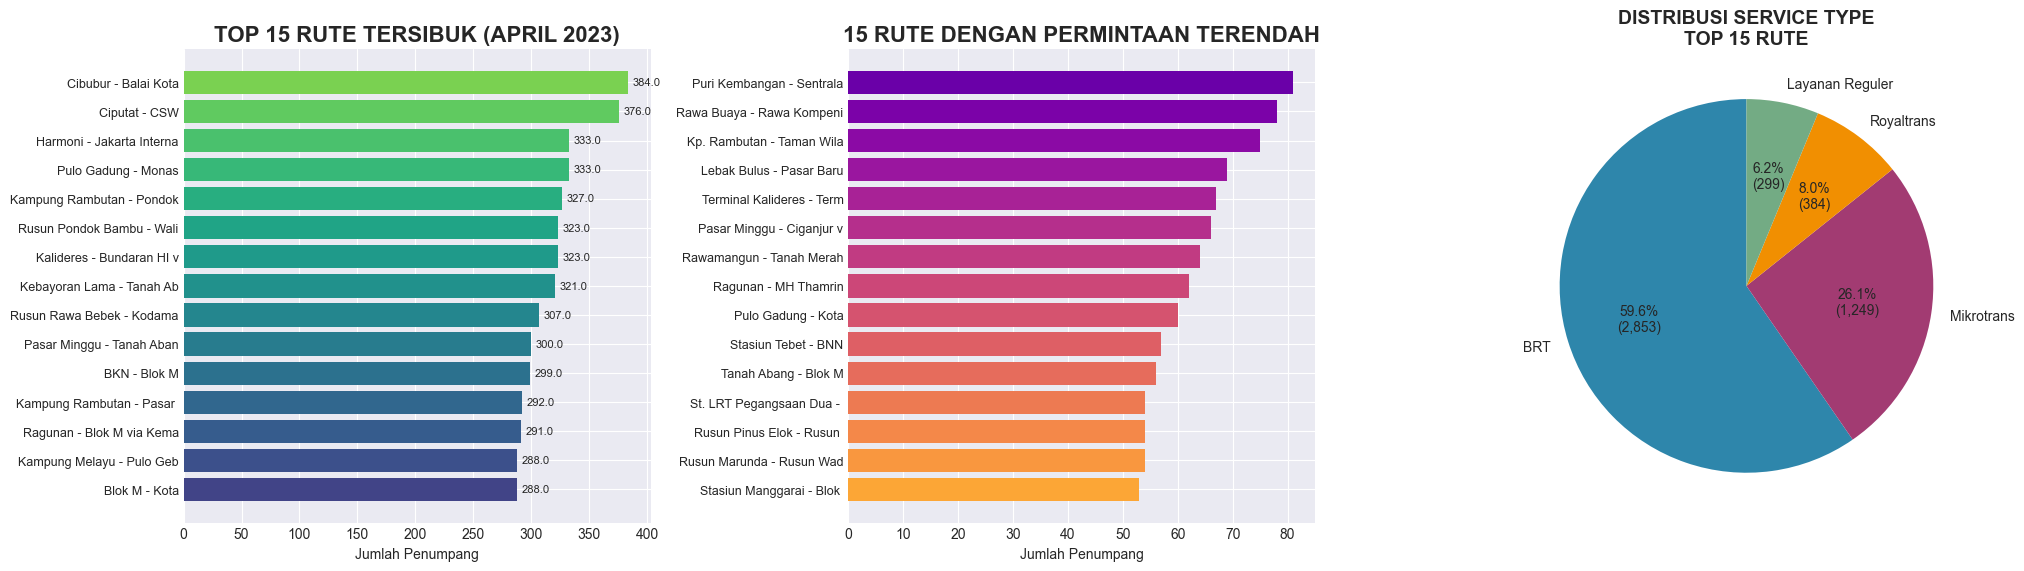

In [178]:
# 1. Top 15 Rute Teratas berdasarkan Jumlah Penumpang
plt.figure(figsize=(20, 16))
plt.subplot(3, 3, 1)
top_15 = significant_routes.head(15)
colors_top = plt.cm.viridis(np.linspace(0.8, 0.2, len(top_15)))
bars = plt.barh(range(len(top_15)), top_15['total_passengers'], color=colors_top)
plt.yticks(range(len(top_15)), [name[:25] for name in top_15.index.get_level_values(0)], fontsize=9)
plt.xlabel('Jumlah Penumpang')
plt.title('TOP 15 RUTE TERSIBUK (APRIL 2023)', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# Add values on bars
for i, (idx, row) in enumerate(top_15.iterrows()):
    plt.text(row['total_passengers'] + max(top_15['total_passengers'])*0.01, i,
             f"{row['total_passengers']:,}", va='center', fontsize=8)

# 2. 15 Rute Terbawah (Low Demand)
plt.subplot(3, 3, 2)
bottom_15 = significant_routes.tail(15)
colors_bottom = plt.cm.plasma(np.linspace(0.2, 0.8, len(bottom_15)))
bars = plt.barh(range(len(bottom_15)), bottom_15['total_passengers'], color=colors_bottom)
plt.yticks(range(len(bottom_15)), [name[:25] for name in bottom_15.index.get_level_values(0)], fontsize=9)
plt.xlabel('Jumlah Penumpang')
plt.title('15 RUTE DENGAN PERMINTAAN TERENDAH', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# 3. Analisis Service Type di Rute Tersibuk
plt.subplot(3, 3, 3)

route_service_map = {}
for idx, row in top_15.iterrows():
    route_name = idx[0]
    service_data = df[df['corridorName'] == route_name]['serviceType']
    if len(service_data) > 0:
        # Ambil service type yang paling umum untuk rute ini
        route_service_map[route_name] = service_data.mode()[0] if len(service_data.mode()) > 0 else 'Unknown'
    else:
        route_service_map[route_name] = 'Unknown'

# Konversi ke DataFrame
service_analysis_df = pd.DataFrame.from_dict(route_service_map, orient='index', columns=['serviceType'])  # PERBAIKAN 3
service_analysis_df['passengers'] = top_15['total_passengers'].values

# Group by serviceType
service_distribution = service_analysis_df.groupby('serviceType')['passengers'].sum().sort_values(ascending=False)

# Plot
if not service_distribution.empty:
    # Gunakan bar chart jika terlalu banyak kategori
    if len(service_distribution) > 6:
        colors_bar = plt.cm.tab20c(np.arange(len(service_distribution)))
        bars = plt.bar(range(len(service_distribution)), service_distribution.values, color=colors_bar)
        plt.xticks(range(len(service_distribution)), service_distribution.index, rotation=45, ha='right')
        plt.ylabel('Total Penumpang')
        plt.title('SERVICE TYPE: TOP 15 RUTE', fontsize=14, fontweight='bold')
        
        # Tambahkan nilai di atas bar
        for i, v in enumerate(service_distribution.values):
            plt.text(i, v + max(service_distribution.values)*0.01, f'{v:,}', 
                     ha='center', fontsize=8)
    else:
        # Pie chart untuk kategori sedikit
        colors_pie = ['#2E86AB', '#A23B72', '#F18F01', '#73AB84', '#C73E1D', '#8B5A2B']
        plt.pie(service_distribution.values, 
                labels=service_distribution.index,
                colors=colors_pie[:len(service_distribution)],
                autopct=lambda p: f'{p:.1f}%\n({int(p*sum(service_distribution.values)/100):,})',
                startangle=90)
        plt.title('DISTRIBUSI SERVICE TYPE\nTOP 15 RUTE', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Tidak ada data\nuntuk analisis', 
             ha='center', va='center', fontsize=10)
    plt.title('ANALISIS SERVICE TYPE\n(DATA TIDAK TERSEDIA)', fontsize=14, fontweight='bold')

plt.ylabel('')

plt.tight_layout()
plt.show()

1. <b>Top 15 Rute Tersibuk</b>

    Grafik menunjukkan bahwa rute dengan jumlah penumpang tertinggi didominasi oleh koridor utama yang menghubungkan pusat aktivitas kota. Beberapa rute dengan permintaan tertinggi antara lain:

    - Cibubur – Balai Kota

    - Ciputat – CSW

    - Harmoni – Jakarta International Stadium

    Rute-rute ini melayani sekitar 350 hingga hampir 400 penumpang, menjadikannya koridor paling sibuk selama April 2023. Tingginya volume penumpang mengindikasikan bahwa rute tersebut berperan sebagai jalur utama komuter, yang menghubungkan kawasan permukiman dengan pusat pemerintahan, bisnis, dan aktivitas publik.

2. <b>Rute dengan Permintaan Terendah</b>

    Sebaliknya, grafik rute dengan permintaan terendah menunjukkan beberapa koridor dengan volume penumpang yang relatif kecil, umumnya di kisaran 50–80 penumpang. Rute dengan permintaan terendah antara lain:

    - Puri Kembangan – Sentraland

    - Rawa Buaya – Rawa Kompeni

    - Kp. Rambutan – Harapan

    Rendahnya jumlah penumpang pada rute-rute ini menunjukkan bahwa intensitas penggunaannya jauh lebih terbatas dibandingkan rute utama. Temuan ini dapat menjadi dasar evaluasi lanjutan terkait efisiensi operasional, misalnya penyesuaian frekuensi layanan atau penguatan konektivitas dengan koridor lain.

3. <b>Distribusi Tipe Layanan pada Top 15 Rute</b>

    Distribusi tipe layanan pada 15 rute tersibuk menunjukkan bahwa layanan <b>BRT</b> mendominasi, dengan proporsi sekitar dua pertiga dari total rute.

    Selain itu, terdapat kontribusi dari <b>Mikrotrans</b> dan <b>Royaltrans</b>, meskipun dengan proporsi yang jauh lebih kecil. Hal ini menunjukkan bahwa koridor dengan permintaan tertinggi terutama dilayani oleh layanan massal, sementara layanan lain berperan sebagai pelengkap.

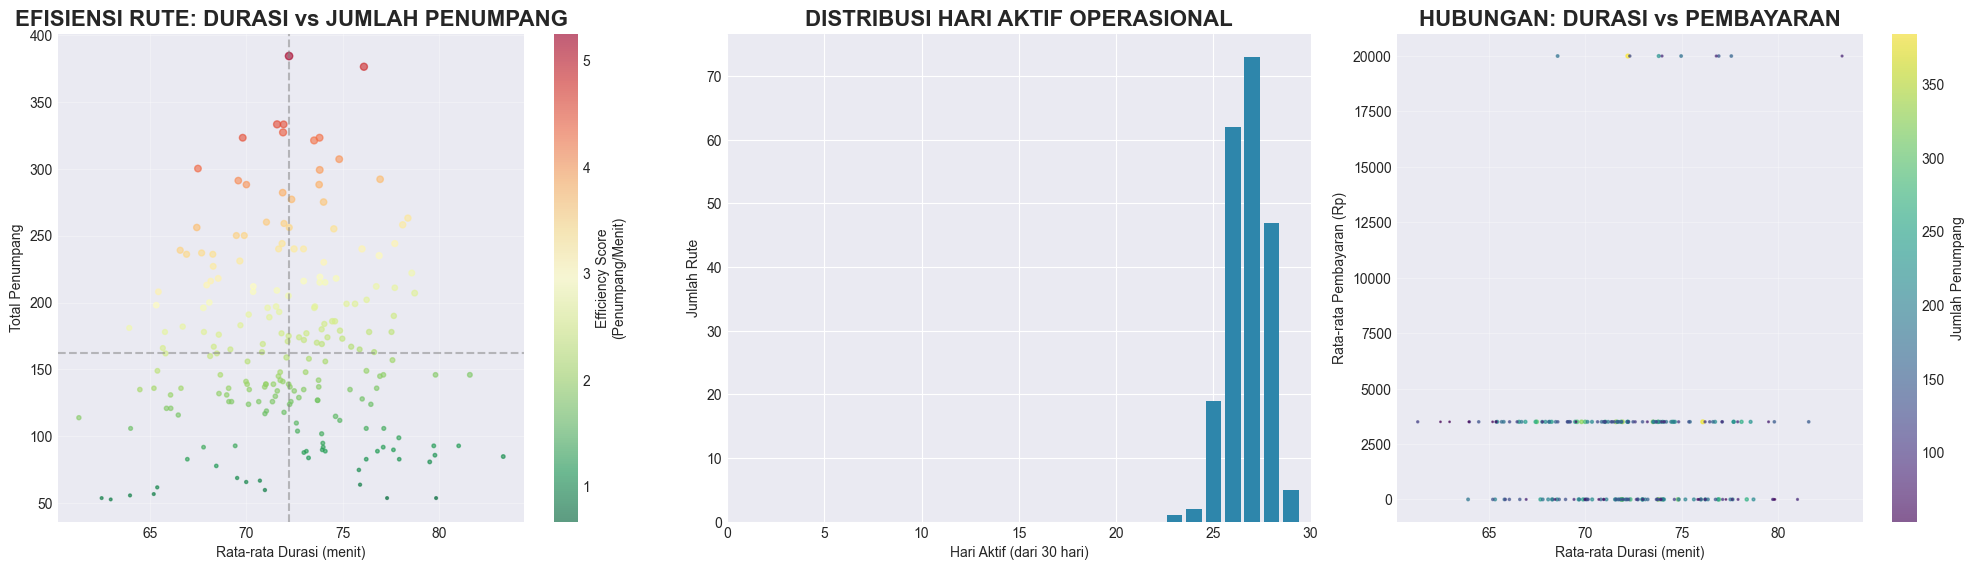

In [179]:
# 4. Duration vs Passengers with Efficiency
plt.figure(figsize=(20, 16))
plt.subplot(3, 3, 4)
scatter = plt.scatter(significant_routes['avg_duration'],
                      significant_routes['total_passengers'],
                      c=significant_routes['efficiency_score'],
                      s=significant_routes['passengers_per_day']*2,
                      alpha=0.6, cmap='RdYlGn_r')
plt.colorbar(scatter, label='Efficiency Score\n(Penumpang/Menit)')
plt.xlabel('Rata-rata Durasi (menit)')
plt.ylabel('Total Penumpang')
plt.title('EFISIENSI RUTE: DURASI vs JUMLAH PENUMPANG', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add quadrant lines
median_duration = significant_routes['avg_duration'].median()
median_passengers = significant_routes['total_passengers'].median()
plt.axvline(x=median_duration, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=median_passengers, color='gray', linestyle='--', alpha=0.5)

# 5. Distribusi Hari Aktif
plt.subplot(3, 3, 5)
active_days_counts = significant_routes['active_days'].value_counts().sort_index()
plt.bar(active_days_counts.index, active_days_counts.values, color='#2E86AB')
plt.xlabel('Hari Aktif (dari 30 hari)')
plt.ylabel('Jumlah Rute')
plt.title('DISTRIBUSI HARI AKTIF OPERASIONAL', fontsize=16, fontweight='bold')
plt.xticks(range(0, 31, 5))

# 6. Payment vs Duration
plt.subplot(3, 3, 6)
bubble = plt.scatter(significant_routes['avg_duration'],
                     significant_routes['avg_payment'],
                     s=significant_routes['total_passengers']/50,
                     c=significant_routes['total_passengers'],
                     alpha=0.6, cmap='viridis')
plt.colorbar(bubble, label='Jumlah Penumpang')
plt.xlabel('Rata-rata Durasi (menit)')
plt.ylabel('Rata-rata Pembayaran (Rp)')
plt.title('HUBUNGAN: DURASI vs PEMBAYARAN', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

1. <b>Efisiensi Rute: Durasi vs Jumlah Penumpang</b>

	Grafik menunjukkan bahwa sebagian besar rute memiliki rata-rata durasi perjalanan di kisaran 65–75 menit, namun jumlah penumpangnya bervariasi cukup lebar, mulai dari rendah hingga sangat tinggi.

    Tidak terlihat hubungan linear yang kuat antara durasi perjalanan dan jumlah penumpang. Hal ini mengindikasikan bahwa rute dengan durasi lebih panjang tidak selalu memiliki permintaan yang lebih tinggi, sehingga efisiensi rute lebih dipengaruhi oleh faktor lain seperti lokasi, fungsi koridor, dan konektivitas.

2. <b>Distribusi Hari Aktif Operasional</b>

	Mayoritas rute beroperasi selama 25–30 hari dalam bulan April, menunjukkan bahwa sebagian besar layanan berjalan secara konsisten sepanjang bulan. Hanya sedikit rute yang memiliki hari operasional lebih rendah, yang kemungkinan berkaitan dengan karakteristik layanan tertentu atau kebutuhan operasional khusus.

3. <b>Hubungan Durasi vs Pembayaran</b>

	Grafik menunjukkan bahwa nilai pembayaran terkonsentrasi pada beberapa level tarif utama, terlepas dari variasi durasi perjalanan.

    Bahkan pada perjalanan dengan durasi yang lebih panjang, nilai pembayaran tidak meningkat secara signifikan. Hal ini mencerminkan bahwa struktur tarif TransJakarta bersifat flat, sehingga durasi perjalanan tidak menjadi faktor penentu besarnya tarif yang dibayarkan penumpang.

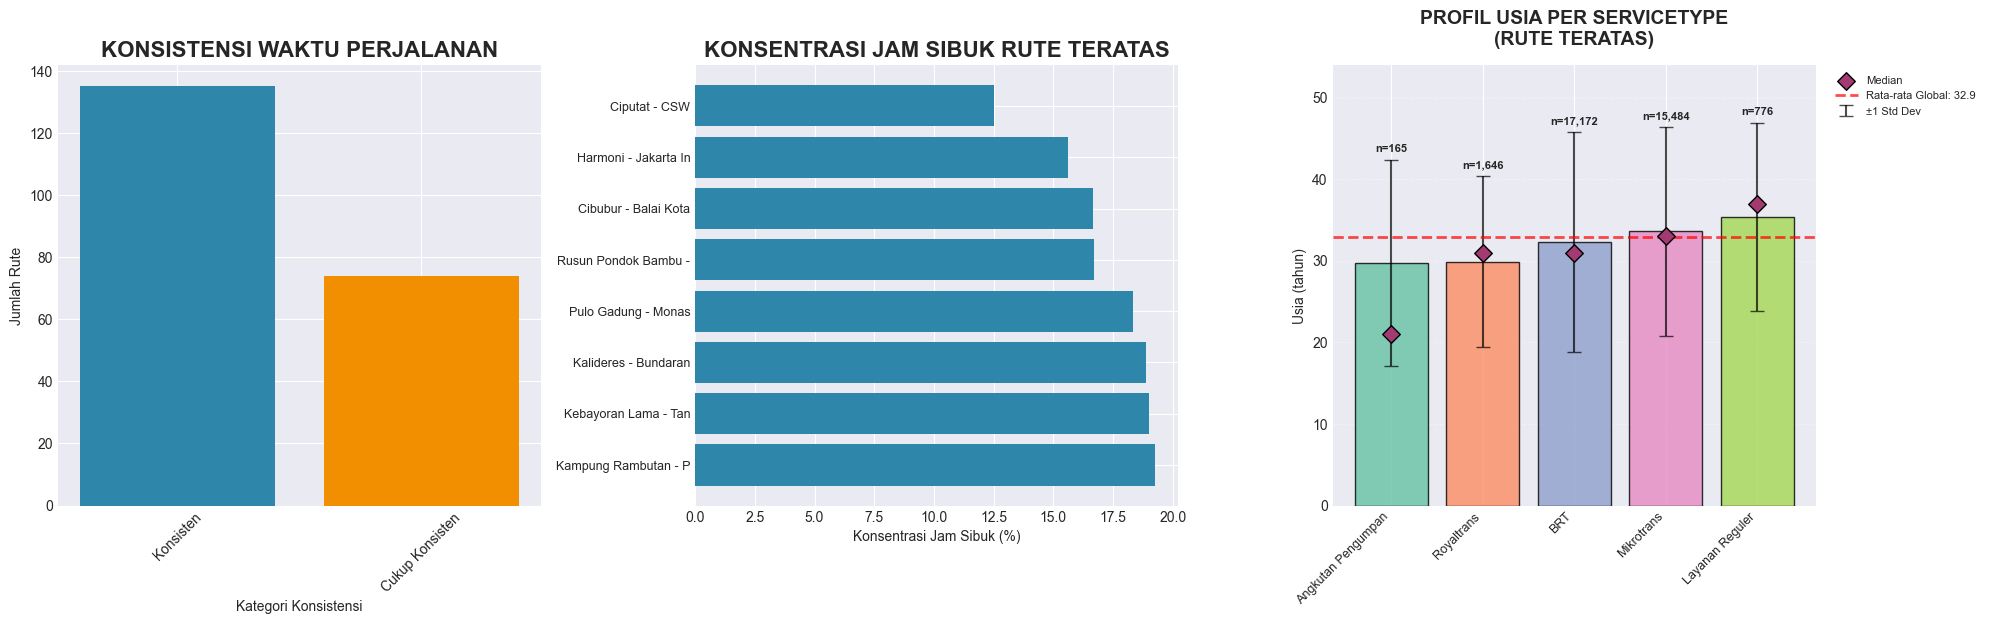

In [180]:
# 7. Analisis Konsistensi
plt.figure(figsize=(20, 16))
plt.subplot(3, 3, 7)
# Categorize consistency
def categorize_consistency(cv):
    if cv < 20: return 'Sangat Konsisten'
    elif cv < 40: return 'Konsisten'
    elif cv < 60: return 'Cukup Konsisten'
    else: return 'Tidak Konsisten'

significant_routes['consistency_category'] = significant_routes['duration_cv'].apply(categorize_consistency)
consistency_counts = significant_routes['consistency_category'].value_counts()
consistency_order = ['Sangat Konsisten', 'Konsisten', 'Cukup Konsisten', 'Tidak Konsisten']
consistency_counts = consistency_counts.reindex(consistency_order)
colors_consistency = ['#73AB84', '#2E86AB', '#F18F01', '#A23B72']
plt.bar(consistency_counts.index, consistency_counts.values, color=colors_consistency)
plt.title('KONSISTENSI WAKTU PERJALANAN', fontsize=16, fontweight='bold')
plt.xlabel('Kategori Konsistensi')
plt.ylabel('Jumlah Rute')
plt.xticks(rotation=45)

# 8. Peak Hour Concentration
plt.subplot(3, 3, 8)
# Calculate peak hour usage per route
route_peak_hour = df_routes.groupby(['corridorName', 'tapIn_hour']).size().unstack(fill_value=0)
route_peak_concentration = (route_peak_hour.max(axis=1) / route_peak_hour.sum(axis=1)) * 100

# Select top routes for visualization
top_routes_names = top_15.index.get_level_values(0)[:8]
top_routes_peak = route_peak_concentration.loc[top_routes_names].sort_values(ascending=True)

plt.barh(range(len(top_routes_peak)), top_routes_peak.values, color='#2E86AB')
plt.yticks(range(len(top_routes_peak)), [name[:20] for name in top_routes_peak.index], fontsize=9)
plt.xlabel('Konsentrasi Jam Sibuk (%)')
plt.title('KONSENTRASI JAM SIBUK RUTE TERATAS', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

# 9. Analisis Demografi per Tipe Layanan
plt.subplot(3, 3, 9)

service_column = None
for col in ['serviceType', 'service_type', 'vehicle_type']:
    if col in df.columns:
        service_column = col
        break

if service_column and len(df_sig) > 0 and service_column in df_sig.columns:
    # Hitung statistik demografi per service type
    service_stats = df_sig.groupby(service_column).agg({
        'age': ['mean', 'median', 'std', 'count']
    }).round(1)
    
    # Flatten column names
    service_stats.columns = ['mean_age', 'median_age', 'std_age', 'passenger_count']
    
    # Filter hanya yang memiliki cukup data
    service_stats = service_stats[service_stats['passenger_count'] >= 10]
    service_stats = service_stats.sort_values('mean_age')
    
    if len(service_stats) > 0:
        # Plot dengan error bars
        x_pos = np.arange(len(service_stats))
        colors = plt.cm.Set2(np.arange(len(service_stats)))
        
        # Bar untuk mean age
        bars = plt.bar(x_pos, service_stats['mean_age'].values,
                      color=colors, alpha=0.8, edgecolor='black', linewidth=1)
        
        # Error bars untuk standard deviation
        plt.errorbar(x_pos, service_stats['mean_age'].values,
                    yerr=service_stats['std_age'].values,
                    fmt='none', color='black', capsize=5, alpha=0.7,
                    label='±1 Std Dev')
        
        # Titik untuk median
        plt.scatter(x_pos, service_stats['median_age'].values,
                   color='#A23B72', s=80, zorder=5, label='Median',
                   edgecolors='black', linewidth=1, marker='D')
        
        plt.xticks(x_pos, service_stats.index, rotation=45, ha='right', fontsize=9)
        plt.ylabel('Usia (tahun)', fontsize=10)
        plt.title(f'PROFIL USIA PER {service_column.upper()}\n(RUTE TERATAS)', 
                 fontsize=14, fontweight='bold', pad=15)
        
        # Garis rata-rata global
        global_mean = df['age'].mean()
        plt.axhline(y=global_mean, color='red', linestyle='--', alpha=0.7,
                   linewidth=2, label=f'Rata-rata Global: {global_mean:.1f}')
        
        # Tambahkan jumlah sampel di atas bar
        for i, (idx, row) in enumerate(service_stats.iterrows()):
            plt.text(i, row['mean_age'] + row['std_age'] + 1,
                    f'n={int(row["passenger_count"]):,}', 
                    ha='center', fontsize=8, fontweight='bold')
        
        # Grid dan legend
        plt.grid(True, alpha=0.3, axis='y', linestyle='--')
        plt.legend(fontsize=8, loc='upper left', bbox_to_anchor=(1.02, 1))
        
        # Set ylim untuk ruang yang cukup
        y_max = max(service_stats['mean_age'] + service_stats['std_age']) * 1.15
        plt.ylim(0, y_max)
        
    else:
        # Jika Ada data tapi tidak cukup
        plt.text(0.5, 0.5, 'Data tersedia tapi\njumlah sampel < 10 per kategori', 
                 ha='center', va='center', fontsize=11, 
                 bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
        plt.title(f'ANALISIS DEMOGRAFI\n(DATA TERBATAS)', 
                 fontsize=14, fontweight='bold', color='orange')

plt.tight_layout()

1. <b>Konsistensi Waktu Perjalanan</b>

	Grafik menunjukkan bahwa mayoritas rute berada dalam kategori waktu perjalanan yang konsisten, dengan jumlah rute konsisten hampir dua kali lipat dibandingkan rute yang tidak konsisten. Hal ini mengindikasikan bahwa secara umum layanan TransJakarta memiliki waktu tempuh yang relatif stabil, sehingga cukup andal bagi penumpang dalam merencanakan perjalanan.

2. <b>Konsentrasi Jam Sibuk pada Rute Teratas</b>

	Rute-rute dengan permintaan tertinggi menunjukkan konsentrasi perjalanan yang cukup besar pada jam sibuk, dengan beberapa koridor mencatat hampir 15–20% perjalanan terjadi saat peak hours.

    Temuan ini menunjukkan bahwa permintaan tinggi pada rute utama sangat dipengaruhi oleh pola komuter, sehingga pengelolaan kapasitas pada jam sibuk menjadi faktor krusial untuk menjaga kualitas layanan.

3. <b>Distribusi Usia Berdasarkan Tipe Layanan</b>

	Mayoritas pengguna berada pada rentang usia produktif (sekitar 25–35 tahun) di seluruh tipe layanan, dengan variasi yang relatif kecil antar kategori.

    Perbedaan rata-rata usia antar tipe layanan relatif kecil, meskipun terlihat bahwa layanan reguler dan Royaltrans cenderung digunakan oleh penumpang dengan usia sedikit lebih tinggi dibandingkan layanan pengumpan. Secara keseluruhan, pola ini menunjukkan segmentasi usia yang cukup konsisten antar layanan.

In [181]:
# ANALISIS KINERJA RUTE BULAN APRIL
print("\nANALISIS KINERJA RUTE BULAN APRIL:")
print("-" * 50)

# Identify routes for different optimization strategies
strategies = {
    'High Demand - Need More Capacity': significant_routes[
        (significant_routes['total_passengers'] > significant_routes['total_passengers'].quantile(0.75)) &
        (significant_routes['efficiency_score'] > significant_routes['efficiency_score'].median())
    ].head(3),
    
    'Low Efficiency - Need Route Optimization': significant_routes[
        (significant_routes['avg_duration'] > 60) &
        (significant_routes['efficiency_score'] < significant_routes['efficiency_score'].quantile(0.25))
    ].head(3),
    
    'Underutilized - Consider Consolidation': significant_routes[
        (significant_routes['total_passengers'] < significant_routes['total_passengers'].quantile(0.25)) &
        (significant_routes['active_days'] < 15)
    ].head(3),
    
    'High Consistency - Best Practice Models': significant_routes[
        (significant_routes['duration_cv'] < 30) &  # Koefisien variasi rendah = konsisten
        (significant_routes['total_passengers'] > significant_routes['total_passengers'].median())
    ].head(2)
}

for strategy, routes in strategies.items():
    if len(routes) > 0:
        print(f"\n{strategy.upper()}:")
        print("-" * 40)
        for idx, row in routes.iterrows():
            route_name = idx[0]  # Hanya ambil nama rute, karena idx sekarang hanya corridorName
            
            # Cari service_type untuk rute ini dari DataFrame utama
            service_type = 'Unknown'
            route_data = df[df['corridorName'] == route_name]
            if len(route_data) > 0 and 'service_type' in route_data.columns:
                service_type = route_data['service_type'].iloc[0]
            
            # Cari peak hour untuk rute ini
            peak_hour_info = ''
            if 'peak_hour' in row and not pd.isna(row['peak_hour']):
                peak_hour_info = f", Jam sibuk: {int(row['peak_hour'])}:00"
            
            print(f"  • {route_name[:40]}...")
            print(f"    Tipe Layanan: {service_type}")
            print(f"    Penumpang: {row['total_passengers']:,}, Durasi: {row['avg_duration']:.1f} menit{peak_hour_info}")
            
            # Tambahkan info tambahan jika tersedia
            if 'day_coverage' in row:
                print(f"    Hari aktif: {int(row['day_coverage'])}/30")
            
            if 'efficiency_score' in row:
                print(f"    Efisiensi: {row['efficiency_score']:.2f}")
            
            if 'duration_cv' in row and 'duration_cv' in strategy.lower():
                print(f"    Konsistensi (CV): {row['duration_cv']:.1f}%")
            
            # Tambahkan rekomendasi spesifik berdasarkan strategi
            if 'High Demand' in strategy:
                print(f"    → REKOMENDASI: Tambah frekuensi, khususnya di jam sibuk")
            elif 'Low Efficiency' in strategy:
                print(f"    → REKOMENDASI: Review rute, optimasi jalur")
            elif 'Underutilized' in strategy:
                print(f"    → REKOMENDASI: Evaluasi kelayakan, pertimbangkan konsolidasi")
            elif 'High Consistency' in strategy:
                print(f"    → REKOMENDASI: Jadikan model best practice untuk rute lain")


ANALISIS KINERJA RUTE BULAN APRIL:
--------------------------------------------------

HIGH DEMAND - NEED MORE CAPACITY:
----------------------------------------
  • Cibubur - Balai Kota...
    Tipe Layanan: Unknown
    Penumpang: 384, Durasi: 72.2 menit
    Efisiensi: 5.25
    → REKOMENDASI: Tambah frekuensi, khususnya di jam sibuk
  • Ciputat - CSW...
    Tipe Layanan: Unknown
    Penumpang: 376, Durasi: 76.1 menit
    Efisiensi: 4.88
    → REKOMENDASI: Tambah frekuensi, khususnya di jam sibuk
  • Harmoni - Jakarta International Stadium...
    Tipe Layanan: Unknown
    Penumpang: 333, Durasi: 71.9 menit
    Efisiensi: 4.57
    → REKOMENDASI: Tambah frekuensi, khususnya di jam sibuk

LOW EFFICIENCY - NEED ROUTE OPTIMIZATION:
----------------------------------------
  • Rusun Waduk Pluit - Penjaringan...
    Tipe Layanan: Unknown
    Penumpang: 128, Durasi: 76.0 menit
    Efisiensi: 1.66
    → REKOMENDASI: Review rute, optimasi jalur
  • Kampung Rambutan - Lebak Bulus...
    Tipe Laya

### ANALISIS 3: TIPE LAYANAN & POLA OPERASIONAL

In [182]:
# Data validation
print(f"\nDATA UNTUK ANALISIS SERVICE TYPE:")
print("-" * 50)
print(f"Total transaksi: {len(df):,}")
print(f"Service types: {df['serviceType'].nunique()}")
print(f"Distribusi:")

# Distribusi service type
service_dist = df['serviceType'].value_counts()
for service, count in service_dist.items():
    percentage = (count / len(df)) * 100
    print(f"  {service}: {count:,} ({percentage:.1f}%)")

# Analisis mendalam per service type
service_analysis = df.groupby('serviceType').agg({
    'transID': 'count',
    'payAmount': ['mean', 'median', 'std'],
    'travel_duration': ['mean', 'median', 'std'],
    'age': 'mean',
    'tapIn_weekend': 'mean',
    'is_peak_hour': 'mean',
    'corridorID': 'nunique'
}).round(2)

# Flatten columns
service_analysis.columns = [
    'total_passengers', 'avg_payment', 'median_payment', 'std_payment',
    'avg_duration', 'median_duration', 'std_duration',
    'avg_age', 'weekend_ratio', 'peak_hour_ratio', 'unique_routes'
]

# Calculate additional metrics
service_analysis['market_share'] = (service_analysis['total_passengers'] / service_analysis['total_passengers'].sum()) * 100
service_analysis['passengers_per_route'] = service_analysis['total_passengers'] / service_analysis['unique_routes']
service_analysis['duration_cv'] = (service_analysis['std_duration'] / service_analysis['avg_duration']) * 100
service_analysis['efficiency'] = service_analysis['total_passengers'] / (service_analysis['avg_duration'] + 1)

print("\nPERFORMANCE BERDASARKAN SERVICE TYPE:")
print("-" * 50)
print(service_analysis[['total_passengers', 'market_share', 'avg_duration', 'avg_payment']])


DATA UNTUK ANALISIS SERVICE TYPE:
--------------------------------------------------
Total transaksi: 35,478
Service types: 5
Distribusi:
  BRT: 17,313 (48.8%)
  Mikrotrans: 15,578 (43.9%)
  Royaltrans: 1,646 (4.6%)
  Layanan Reguler: 776 (2.2%)
  Angkutan Pengumpan: 165 (0.5%)

PERFORMANCE BERDASARKAN SERVICE TYPE:
--------------------------------------------------
                    total_passengers  market_share  avg_duration  avg_payment
serviceType                                                                  
Angkutan Pengumpan               165      0.465077         75.87          NaN
BRT                            17313     48.799256         71.63       3500.0
Layanan Reguler                  776      2.187271         73.17          NaN
Mikrotrans                     15578     43.908901         72.52          0.0
Royaltrans                      1646      4.639495         74.18      20000.0


Nilai NaN pada rata-rata pembayaran untuk Angkutan Pengumpan dan Layanan Reguler bukan merupakan kesalahan data, melainkan mencerminkan bahwa informasi pembayaran memang tidak tersedia atau tidak tercatat pada jenis layanan tersebut.

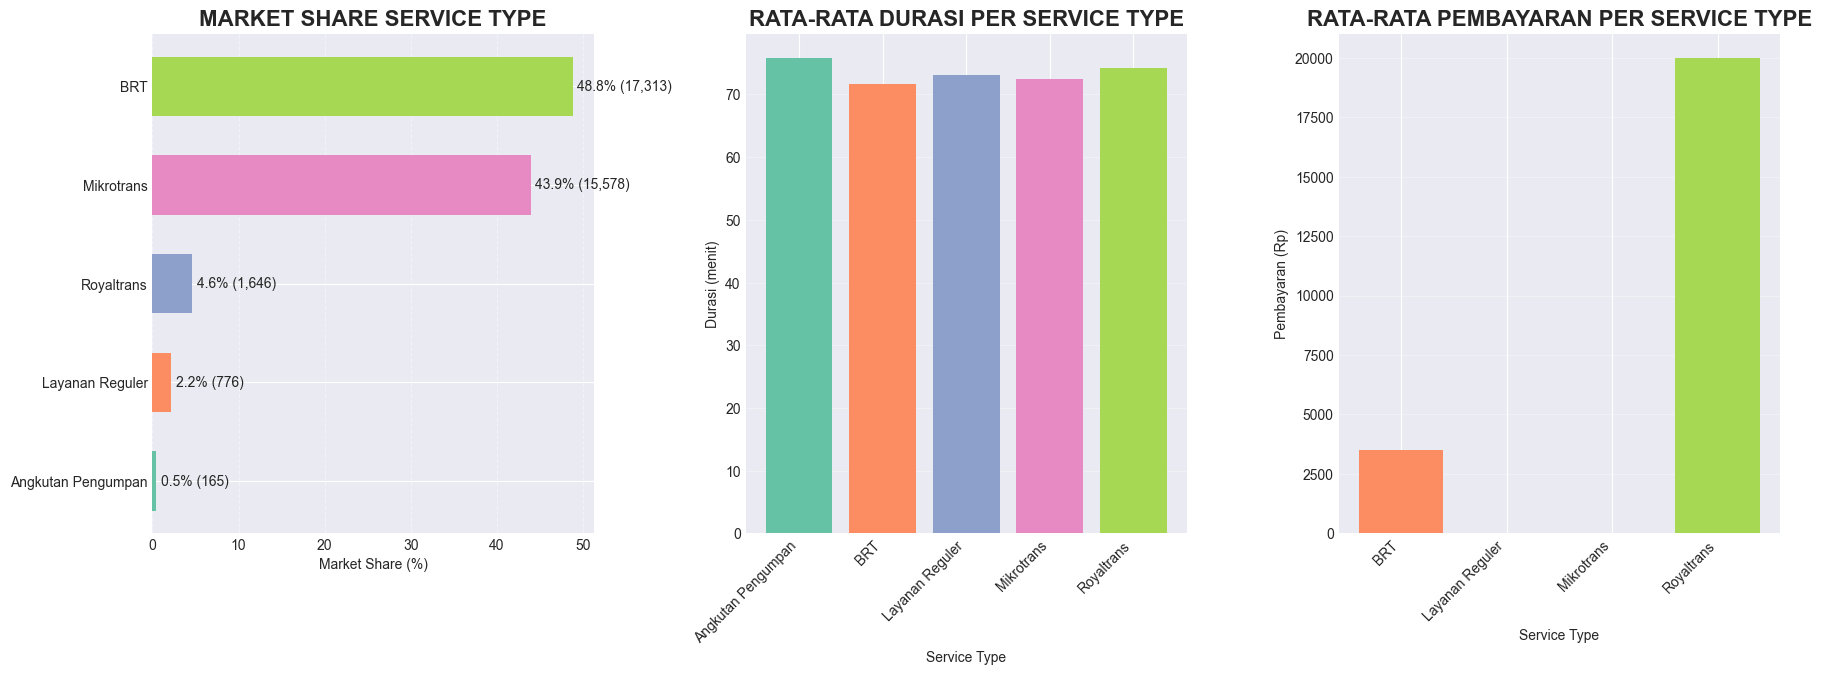

In [183]:
plt.figure(figsize=(18, 12))

# 1. Market Share (subplot 1)
plt.subplot(2, 3, 1)

service_analysis_sorted = service_analysis.sort_values(
    'market_share', ascending=True
)

bars = plt.barh(
    service_analysis_sorted.index,
    service_analysis_sorted['market_share'],
    color=colors[:len(service_analysis_sorted)],
    height=0.6
)

for bar, passengers in zip(
    bars,
    service_analysis_sorted['total_passengers']
):
    width = bar.get_width()
    plt.text(
        width + 0.5,
        bar.get_y() + bar.get_height()/2,
        f'{width:.1f}% ({passengers:,})',
        va='center',
        fontsize=10
    )

plt.title('MARKET SHARE SERVICE TYPE', fontsize=16, fontweight='bold')
plt.xlabel('Market Share (%)')
plt.grid(axis='x', linestyle='--', alpha=0.4)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 2. Average Duration
plt.subplot(2, 3, 2)
plt.bar(
    service_analysis.index,
    service_analysis['avg_duration'],
    color=colors[:len(service_analysis)]
)
plt.title('RATA-RATA DURASI PER SERVICE TYPE', fontsize=16, fontweight='bold')
plt.xlabel('Service Type')
plt.ylabel('Durasi (menit)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# 3. Average Payment
plt.subplot(2, 3, 3)
plt.bar(
    service_analysis.index,
    service_analysis['avg_payment'],
    color=colors[:len(service_analysis)]
)
plt.title('RATA-RATA PEMBAYARAN PER SERVICE TYPE', fontsize=16, fontweight='bold')
plt.xlabel('Service Type')
plt.ylabel('Pembayaran (Rp)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

1. <b>Market Share per Service Type</b>

    Grafik market share menunjukkan bahwa layanan BRT dan Mikrotrans mendominasi penggunaan TransJakarta, dengan porsi masing-masing sekitar 48,8% dan 43,9% dari total perjalanan. Hal ini menegaskan peran kedua layanan tersebut sebagai tulang punggung mobilitas harian.

    Sementara itu, Royaltrans, Layanan Reguler, dan Angkutan Pengumpan memiliki pangsa pasar yang relatif kecil, sehingga lebih berfungsi sebagai layanan pelengkap untuk segmen atau kebutuhan tertentu.

2. <b>Rata-Rata Durasi Perjalanan per Service Type</b>

    Rata-rata durasi perjalanan antar service type berada pada kisaran yang relatif seragam, yaitu sekitar 70–75 menit. Tidak terlihat perbedaan durasi yang ekstrem antar layanan.

    Kondisi ini menunjukkan bahwa meskipun jenis layanan berbeda, karakteristik waktu tempuh perjalanan relatif mirip, dan perbedaan service type lebih mencerminkan fungsi layanan dibandingkan jarak atau durasi perjalanan.

3. <b>Rata-Rata Pembayaran per Service Type</b>

    Grafik pembayaran memperlihatkan perbedaan yang sangat jelas antar service type. Royaltrans memiliki rata-rata pembayaran tertinggi, mencerminkan posisinya sebagai layanan premium.

    Sebaliknya, BRT memiliki tarif menengah yang tetap, sementara Mikrotrans dan layanan tertentu tidak menunjukkan nilai pembayaran, karena bersifat gratis atau tidak mencatat pembayaran dalam sistem. Hal ini menegaskan bahwa perbedaan layanan lebih tercermin pada struktur tarif dibandingkan durasi perjalanan.

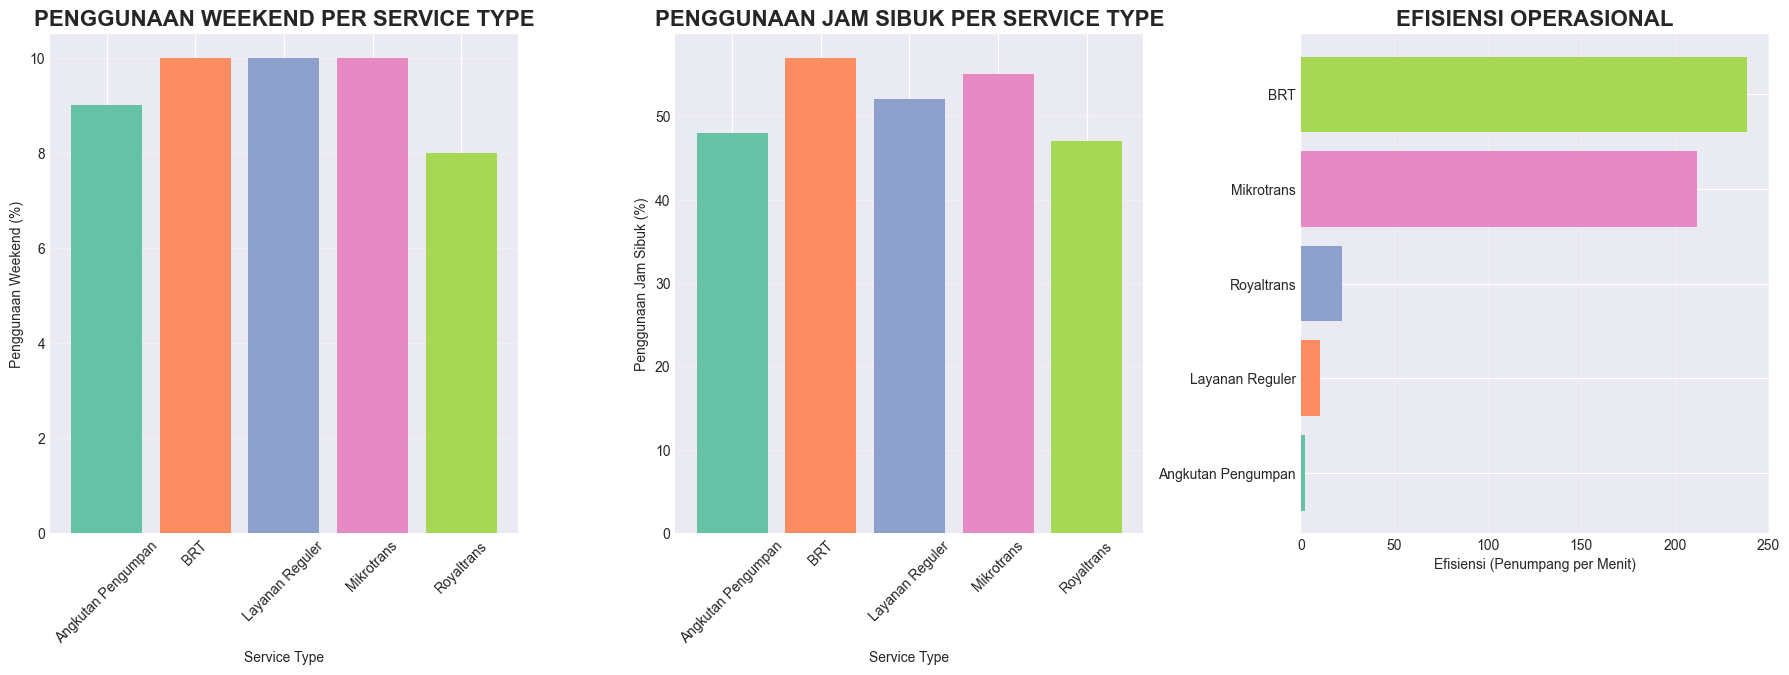

In [184]:
plt.figure(figsize=(18, 12))

# 4. Weekend Usage Pattern
plt.subplot(2, 3, 4)
plt.bar(service_analysis.index, service_analysis['weekend_ratio'] * 100,
        color=colors[:len(service_analysis)])
plt.title('PENGGUNAAN WEEKEND PER SERVICE TYPE', fontsize=16, fontweight='bold')
plt.xlabel('Service Type')
plt.ylabel('Penggunaan Weekend (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# 5. Peak Hour Usage
plt.subplot(2, 3, 5)
plt.bar(service_analysis.index, service_analysis['peak_hour_ratio'] * 100,
        color=colors[:len(service_analysis)])
plt.title('PENGGUNAAN JAM SIBUK PER SERVICE TYPE', fontsize=16, fontweight='bold')
plt.xlabel('Service Type')
plt.ylabel('Penggunaan Jam Sibuk (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# 6. Efficiency (Passengers per Minute)
plt.subplot(2, 3, 6)
efficiency_sorted = service_analysis.sort_values('efficiency', ascending=True)
plt.barh(range(len(efficiency_sorted)), efficiency_sorted['efficiency'],
         color=colors[:len(efficiency_sorted)])
plt.yticks(range(len(efficiency_sorted)), efficiency_sorted.index)
plt.xlabel('Efisiensi (Penumpang per Menit)')
plt.title('EFISIENSI OPERASIONAL', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

1. <b>Penggunaan Weekend per Service Type</b>

    Grafik menunjukkan bahwa proporsi penggunaan pada akhir pekan relatif rendah di seluruh service type, berada di kisaran 8–10%. Hal ini mengindikasikan bahwa sebagian besar layanan TransJakarta lebih banyak digunakan pada hari kerja.

    Royaltrans memiliki proporsi penggunaan weekend yang paling rendah, yang menunjukkan bahwa layanan ini lebih berorientasi pada mobilitas rutin hari kerja dibandingkan kebutuhan rekreasional.

2. <b>Penggunaan Jam Sibuk per Service Type</b>

    Pada grafik penggunaan jam sibuk, terlihat bahwa lebih dari separuh perjalanan pada sebagian besar service type terjadi saat peak hours. BRT dan Mikrotrans memiliki proporsi penggunaan jam sibuk tertinggi, yang menegaskan perannya sebagai layanan utama komuter. Sebaliknya, Angkutan Pengumpan dan Royaltrans memiliki proporsi sedikit lebih rendah, meskipun tetap signifikan.

3. <b>Efisiensi Operasional</b>

    Grafik efisiensi operasional menunjukkan perbedaan yang sangat jelas antar service type. BRT dan Mikrotrans memiliki tingkat efisiensi tertinggi, diukur dari jumlah penumpang per menit perjalanan.

    Sebaliknya, Royaltrans, Layanan Reguler, dan Angkutan Pengumpan memiliki efisiensi yang jauh lebih rendah, yang mencerminkan fungsi mereka sebagai layanan premium atau pendukung, bukan layanan massal.

In [185]:
# ANALISIS TIPE LAYANAN & POLA OPERASIONAL
print("\nANALISIS TIPE LAYANAN & POLA OPERASIONAL:")
print("-" * 50)

for service_type, data in service_analysis.iterrows():
    print(f"\n{service_type}:")
    print(f"  • Market Share: {data['market_share']:.1f}%")
    print(f"  • Rata-rata durasi: {data['avg_duration']:.1f} menit")
    print(f"  • Rata-rata tarif: Rp {data['avg_payment']:,.0f}")
    print(f"  • Penggunaan weekend: {data['weekend_ratio']*100:.1f}%")
    print(f"  • Penggunaan jam sibuk: {data['peak_hour_ratio']*100:.1f}%")
    
    # Generate specific recommendations
    if data['market_share'] > 20:
        print(f"  → Service utama, pertahankan kualitas layanan")
    
    if data['weekend_ratio'] > 0.3:
        print(f"  → Populer di weekend, optimalkan layanan weekend")
    
    if data['peak_hour_ratio'] > 0.6:
        print(f"  → Sangat padat di jam sibuk, tambah frekuensi")
    
    if data['avg_duration'] > 60:
        print(f"  → Durasi panjang, evaluasi optimasi rute")
    
    if data['efficiency'] < service_analysis['efficiency'].median():
        print(f"  → Efisiensi di bawah rata-rata, perlu perbaikan")


ANALISIS TIPE LAYANAN & POLA OPERASIONAL:
--------------------------------------------------

Angkutan Pengumpan:
  • Market Share: 0.5%
  • Rata-rata durasi: 75.9 menit
  • Rata-rata tarif: Rp nan
  • Penggunaan weekend: 9.0%
  • Penggunaan jam sibuk: 48.0%
  → Durasi panjang, evaluasi optimasi rute
  → Efisiensi di bawah rata-rata, perlu perbaikan

BRT:
  • Market Share: 48.8%
  • Rata-rata durasi: 71.6 menit
  • Rata-rata tarif: Rp 3,500
  • Penggunaan weekend: 10.0%
  • Penggunaan jam sibuk: 57.0%
  → Service utama, pertahankan kualitas layanan
  → Durasi panjang, evaluasi optimasi rute

Layanan Reguler:
  • Market Share: 2.2%
  • Rata-rata durasi: 73.2 menit
  • Rata-rata tarif: Rp nan
  • Penggunaan weekend: 10.0%
  • Penggunaan jam sibuk: 52.0%
  → Durasi panjang, evaluasi optimasi rute
  → Efisiensi di bawah rata-rata, perlu perbaikan

Mikrotrans:
  • Market Share: 43.9%
  • Rata-rata durasi: 72.5 menit
  • Rata-rata tarif: Rp 0
  • Penggunaan weekend: 10.0%
  • Penggunaan jam

### ANALISIS 4: PERBANDINGAN DAN OPTIMASI

In [186]:
# Data validation
print(f"\nDATA UNTUK ANALISIS PERBANDINGAN RUTE:")
print("-" * 50)
print(f"Jumlah rute yang dianalisis: {len(significant_routes)}")
print(f"Rentang penumpang: {significant_routes['total_passengers'].min():,} - {significant_routes['total_passengers'].max():,}")
print(f"Rentang durasi: {significant_routes['avg_duration'].min():.1f} - {significant_routes['avg_duration'].max():.1f} menit")

# 1. Comprehensive Route Comparison Metrics
print("\n1. METRIK PERBANDINGAN RUTE UTAMA:")
print("-" * 50)

# Hitung metrik komparatif
comparison_metrics = ['total_passengers', 'avg_duration', 'efficiency_score', 'duration_cv', 'active_days']

for metric in comparison_metrics:
    if metric in significant_routes.columns:
        min_val = significant_routes[metric].min()
        max_val = significant_routes[metric].max()
        mean_val = significant_routes[metric].mean()
        
        print(f"\n{metric.replace('_', ' ').title()}:")
        print(f"  Min: {min_val:.2f}" if isinstance(min_val, float) else f"  Min: {min_val:,}")
        print(f"  Max: {max_val:.2f}" if isinstance(max_val, float) else f"  Max: {max_val:,}")
        print(f"  Mean: {mean_val:.2f}" if isinstance(mean_val, float) else f"  Mean: {mean_val:,.0f}")
        print(f"  Std Dev: {significant_routes[metric].std():.2f}")

# 2. Route Segmentation Analysis
print("\n2. SEGMENTASI RUTE BERDASARKAN KINERJA:")
print("-" * 50)

def segment_routes(row):
    """Segmentasi rute berdasarkan multiple criteria"""
    segments = []
    
    # Berdasarkan volume
    q75 = significant_routes['total_passengers'].quantile(0.75)
    q25 = significant_routes['total_passengers'].quantile(0.25)
    
    if row['total_passengers'] > q75:
        segments.append('High_Volume')
    elif row['total_passengers'] < q25:
        segments.append('Low_Volume')
    else:
        segments.append('Medium_Volume')
    
    # Berdasarkan efisiensi
    eff_q75 = significant_routes['efficiency_score'].quantile(0.75)
    eff_q25 = significant_routes['efficiency_score'].quantile(0.25)
    
    if row['efficiency_score'] > eff_q75:
        segments.append('High_Efficiency')
    elif row['efficiency_score'] < eff_q25:
        segments.append('Low_Efficiency')
    else:
        segments.append('Medium_Efficiency')
    
    # Berdasarkan konsistensi
    if 'duration_cv' in row:
        if row['duration_cv'] < 30:
            segments.append('High_Consistency')
        elif row['duration_cv'] > 60:
            segments.append('Low_Consistency')
        else:
            segments.append('Medium_Consistency')
    
    return '_'.join(segments)

significant_routes['performance_segment'] = significant_routes.apply(segment_routes, axis=1)

# Analisis segmentasi
segment_counts = significant_routes['performance_segment'].value_counts()
print("\nDistribusi Segment Kinerja:")
for segment, count in segment_counts.head(10).items():
    percentage = (count / len(significant_routes)) * 100
    print(f"  {segment}: {count} rute ({percentage:.1f}%)")


DATA UNTUK ANALISIS PERBANDINGAN RUTE:
--------------------------------------------------
Jumlah rute yang dianalisis: 209
Rentang penumpang: 53 - 384
Rentang durasi: 61.3 - 83.3 menit

1. METRIK PERBANDINGAN RUTE UTAMA:
--------------------------------------------------

Total Passengers:
  Min: 53
  Max: 384
  Mean: 168.62
  Std Dev: 68.14

Avg Duration:
  Min: 61.32
  Max: 83.31
  Mean: 72.15
  Std Dev: 4.00

Efficiency Score:
  Min: 0.67
  Max: 5.25
  Mean: 2.31
  Std Dev: 0.93

Duration Cv:
  Min: 29.91
  Max: 50.06
  Mean: 38.91
  Std Dev: 3.27

Active Days:
  Min: 23
  Max: 29
  Mean: 26.75
  Std Dev: 1.04

2. SEGMENTASI RUTE BERDASARKAN KINERJA:
--------------------------------------------------

Distribusi Segment Kinerja:
  Medium_Volume_Medium_Efficiency_Medium_Consistency: 97 rute (46.4%)
  High_Volume_High_Efficiency_Medium_Consistency: 48 rute (23.0%)
  Low_Volume_Low_Efficiency_Medium_Consistency: 45 rute (21.5%)
  Medium_Volume_Low_Efficiency_Medium_Consistency: 6 rute

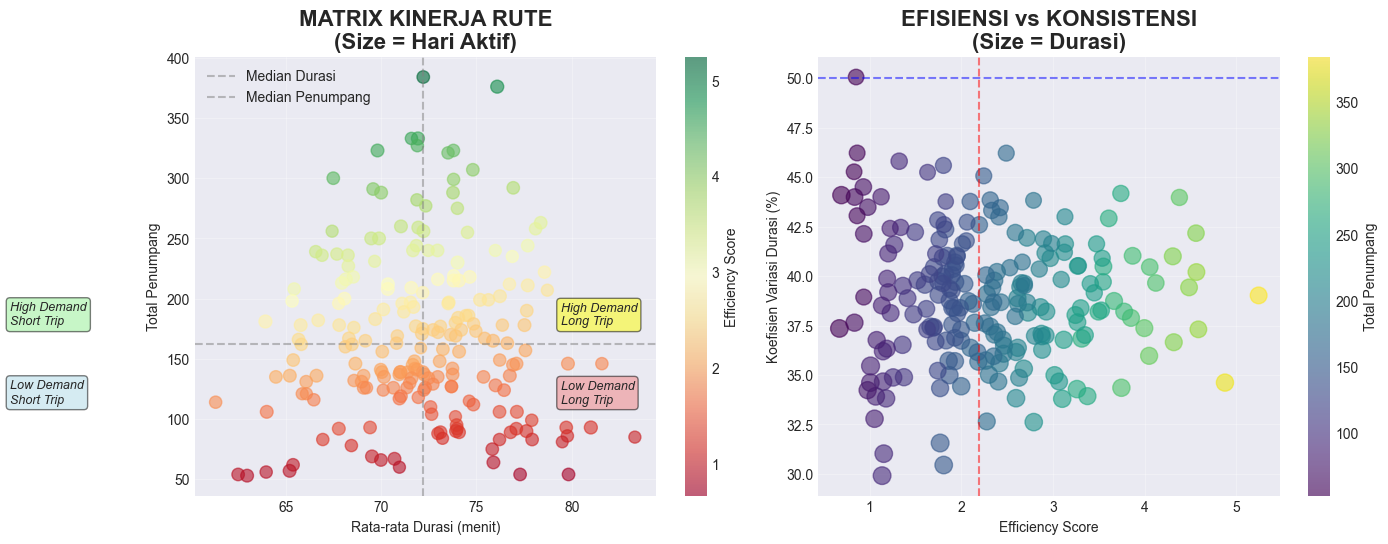

In [187]:
# 1. Performance Matrix
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
scatter = plt.scatter(significant_routes['avg_duration'], 
                      significant_routes['total_passengers'],
                      c=significant_routes['efficiency_score'],
                      s=significant_routes['active_days']*3,
                      alpha=0.6, cmap='RdYlGn')
plt.colorbar(scatter, label='Efficiency Score')
plt.xlabel('Rata-rata Durasi (menit)')
plt.ylabel('Total Penumpang')
plt.title('MATRIX KINERJA RUTE\n(Size = Hari Aktif)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Quadrant lines
median_duration = significant_routes['avg_duration'].median()
median_passengers = significant_routes['total_passengers'].median()
plt.axvline(x=median_duration, color='gray', linestyle='--', alpha=0.5, label='Median Durasi')
plt.axhline(y=median_passengers, color='gray', linestyle='--', alpha=0.5, label='Median Penumpang')

# Anotasi quadrant
plt.text(median_duration*1.1, median_passengers*1.1, 'High Demand\nLong Trip', 
         fontsize=9, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))
plt.text(median_duration*0.7, median_passengers*1.1, 'High Demand\nShort Trip', 
         fontsize=9, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.5))
plt.text(median_duration*1.1, median_passengers*0.7, 'Low Demand\nLong Trip', 
         fontsize=9, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.5))
plt.text(median_duration*0.7, median_passengers*0.7, 'Low Demand\nShort Trip', 
         fontsize=9, style='italic', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5))

plt.legend()

# 2. Efficiency vs Consistency
plt.subplot(3, 3, 2)
if 'duration_cv' in significant_routes.columns:
    scatter2 = plt.scatter(significant_routes['efficiency_score'],
                          significant_routes['duration_cv'],
                          c=significant_routes['total_passengers'],
                          s=significant_routes['avg_duration']*2,
                          alpha=0.6, cmap='viridis')
    plt.colorbar(scatter2, label='Total Penumpang')
    plt.xlabel('Efficiency Score')
    plt.ylabel('Koefisien Variasi Durasi (%)')
    plt.title('EFISIENSI vs KONSISTENSI\n(Size = Durasi)', fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Ideal zone (high efficiency, low variability)
    plt.axvline(x=significant_routes['efficiency_score'].median(), 
                color='red', linestyle='--', alpha=0.5, label='Median Efficiency')
    plt.axhline(y=50, color='blue', linestyle='--', alpha=0.5, label='CV Threshold 50%')

plt.tight_layout()
plt.show()

1. <b>Matrix Kinerja Rute</b>

	Grafik ini memetakan kinerja rute berdasarkan jumlah penumpang (demand) dan rata-rata durasi perjalanan, sehingga terbentuk empat kuadran kinerja operasional. Sebagian besar rute terkonsentrasi pada durasi menengah dengan tingkat demand moderat, yang menunjukkan bahwa secara umum jaringan TransJakarta beroperasi dalam kondisi yang relatif seimbang.

    Namun, terdapat dua kelompok rute yang perlu mendapatkan perhatian khusus:

    - High Demand – Long Trip
    Rute pada kategori ini memiliki jumlah penumpang yang tinggi namun disertai durasi perjalanan yang panjang. Kondisi ini berpotensi menimbulkan kepadatan dan tekanan operasional, sehingga menjadi kandidat utama untuk evaluasi kapasitas, frekuensi, atau perbaikan waktu tempuh.

    - Low Demand – Long Trip
    Kategori ini mengindikasikan potensi inefisiensi operasional, karena armada digunakan dalam waktu yang relatif lama tetapi melayani jumlah penumpang yang terbatas. Rute-rute ini layak dievaluasi dari sisi desain rute atau penyesuaian layanan.

2. <b>Efisiensi vs Konsistensi</b>

    Grafik kedua menunjukkan hubungan antara efisiensi operasional dan konsistensi waktu perjalanan (diukur melalui variasi durasi). Mayoritas rute berada di sekitar nilai median efisiensi dan variasi durasi, yang menunjukkan bahwa sistem secara umum beroperasi cukup stabil tanpa fluktuasi waktu perjalanan yang ekstrem.

    Beberapa temuan penting:

    - Rute dengan efisiensi tinggi cenderung tetap memiliki variasi durasi yang terkendali, menandakan operasional yang relatif matang dan andal.

    - Sebaliknya, rute dengan efisiensi rendah menunjukkan variasi durasi yang lebih besar, yang berpotensi menurunkan tingkat prediktabilitas perjalanan bagi penumpang.

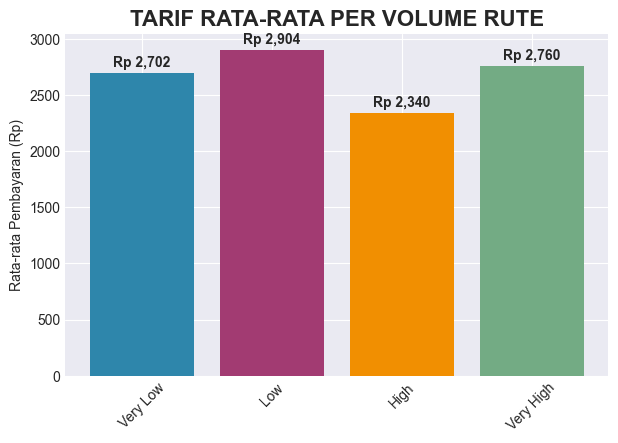

In [188]:
# 3. Payment Analysis
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 5)
if 'avg_payment' in significant_routes.columns:
    payment_by_segment = significant_routes.groupby(
        pd.qcut(significant_routes['total_passengers'], 4, labels=['Very Low', 'Low', 'High', 'Very High'])
    )['avg_payment'].mean()
    
    colors_payment = ['#2E86AB', '#A23B72', '#F18F01', '#73AB84']
    bars = plt.bar(range(len(payment_by_segment)), payment_by_segment.values, color=colors_payment)
    plt.xticks(range(len(payment_by_segment)), payment_by_segment.index, rotation=45)
    plt.ylabel('Rata-rata Pembayaran (Rp)')
    plt.title('TARIF RATA-RATA PER VOLUME RUTE', fontsize=16, fontweight='bold')
    
    for i, v in enumerate(payment_by_segment.values):
        plt.text(
    i,
    v + (max(payment_by_segment.values) * 0.02),  # hanya naik 2%
    f'Rp {v:,.0f}',
    ha='center',
    fontsize=10,
    fontweight='bold'
)

plt.tight_layout()
plt.show()

<b>Tarif Rata-rata Berdasarkan Volume Rute</b>

Grafik menunjukkan bahwa rata-rata tarif antar kelompok volume rute relatif seragam, berada pada kisaran sekitar Rp2.300 hingga Rp2.900 per perjalanan. Perbedaan antar kelompok terlihat, namun tidak bersifat ekstrem, yang mengindikasikan bahwa struktur tarif TransJakarta tidak ditentukan oleh tingkat volume penumpang suatu rute.

Kelompok rute dengan volume Low mencatat tarif rata-rata tertinggi, sementara kelompok High justru memiliki tarif rata-rata terendah. Kelompok Very Low dan Very High berada di kisaran menengah.

Temuan ini menunjukkan bahwa tinggi rendahnya permintaan penumpang tidak berkorelasi langsung dengan besarnya tarif yang dibayarkan, dan lebih mencerminkan perbedaan jenis layanan atau skema tarif yang berlaku pada masing-masing rute.

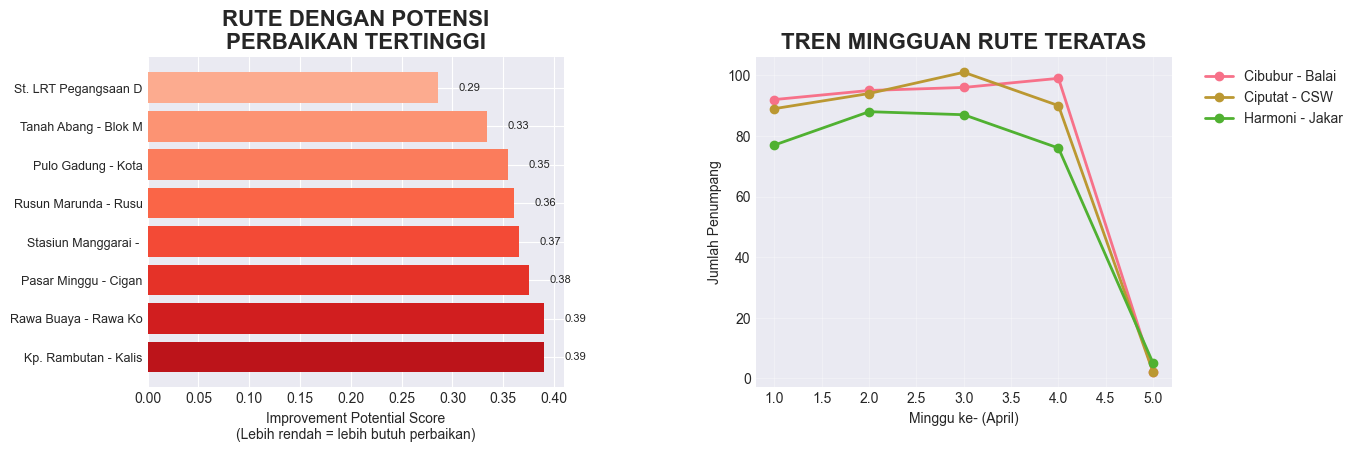

In [189]:
# 4. Improvement Potential Analysis
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 7)
# Hitung improvement potential score
if all(col in significant_routes.columns for col in ['efficiency_score', 'duration_cv', 'active_days']):
    # Normalisasi metrik
    significant_routes['eff_norm'] = (significant_routes['efficiency_score'] - 
                                      significant_routes['efficiency_score'].min()) / \
                                     (significant_routes['efficiency_score'].max() - 
                                      significant_routes['efficiency_score'].min())
    
    significant_routes['consistency_norm'] = 1 - ((significant_routes['duration_cv'] - 
                                                   significant_routes['duration_cv'].min()) / 
                                                  (significant_routes['duration_cv'].max() - 
                                                   significant_routes['duration_cv'].min()))
    
    significant_routes['coverage_norm'] = significant_routes['active_days'] / 30
    
    # Improvement potential score (lower = more potential for improvement)
    significant_routes['improvement_potential'] = (
        significant_routes['eff_norm'] * 0.4 +
        significant_routes['consistency_norm'] * 0.3 +
        significant_routes['coverage_norm'] * 0.3
    )
    
    # Top routes needing improvement
    need_improvement = significant_routes.nsmallest(8, 'improvement_potential')
    
    plt.barh(range(len(need_improvement)), need_improvement['improvement_potential'].values,
             color=plt.cm.Reds(np.linspace(0.3, 0.8, len(need_improvement))))
    plt.yticks(range(len(need_improvement)), [name[:20] for name in need_improvement.index.get_level_values(0)], fontsize=9)
    plt.xlabel('Improvement Potential Score\n(Lebih rendah = lebih butuh perbaikan)')
    plt.title('RUTE DENGAN POTENSI\nPERBAIKAN TERTINGGI', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()
    
    for i, v in enumerate(need_improvement['improvement_potential'].values):
        plt.text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=8)

# 5. Trend Analysis (if multi-week data)
plt.subplot(3, 3, 8)
try:
    # Analyze weekly trends for top routes
    top_3_routes = significant_routes.nlargest(3, 'total_passengers').index.get_level_values(0)
    
    for i, route in enumerate(top_3_routes):
        route_weekly = df[df['corridorName'] == route].groupby('week_of_april').size()
        plt.plot(route_weekly.index, route_weekly.values, marker='o', 
                 label=route[:15], linewidth=2)
    
    plt.xlabel('Minggu ke- (April)')
    plt.ylabel('Jumlah Penumpang')
    plt.title('TREN MINGGUAN RUTE TERATAS', fontsize=16, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
except Exception as e:
    plt.text(0.5, 0.5, 'Data tren mingguan\ntidak tersedia', 
             ha='center', va='center', fontsize=11)
    plt.title('ANALISIS TREN\n(DATA TIDAK CUKUP)', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

1. <b>Rute dengan Potensi Perbaikan Tertinggi</b>

	Grafik menampilkan rute-rute dengan improvement potential score tertinggi, yang mengindikasikan adanya ruang perbaikan kinerja operasional. Beberapa rute dengan skor tertinggi antara lain:

    - Kp. Rambutan – Kalideres

    - Rawa Buaya – Rawa Kompeni

    - Pasar Minggu – Ciganjur

    Skor yang relatif tinggi mencerminkan kombinasi durasi perjalanan yang cukup panjang dengan volume penumpang yang belum optimal, sehingga berpotensi menyebabkan pemanfaatan armada kurang efisien. Rute-rute ini menjadi kandidat utama untuk evaluasi lebih lanjut, seperti penyesuaian rute, frekuensi, atau integrasi layanan.

2. <b>Tren Mingguan Rute Teratas</b>

	Grafik tren mingguan menunjukkan bahwa tiga rute dengan permintaan tertinggi—Cibubur – Balai Kota, Ciputat – CSW, dan Harmoni – Jakarta International Stadium—memiliki pola yang relatif serupa. Jumlah penumpang meningkat dari minggu pertama hingga mencapai puncak di minggu ketiga, kemudian menurun pada minggu keempat.

    Penurunan yang sangat tajam pada minggu kelima terutama disebabkan oleh jumlah hari yang lebih sedikit, bukan penurunan permintaan yang sesungguhnya.

    Secara konsisten, Ciputat – CSW dan Cibubur – Balai Kota mencatat volume penumpang yang lebih tinggi dibandingkan Harmoni – Jakarta International Stadium, menegaskan peran keduanya sebagai koridor mobilitas utama.

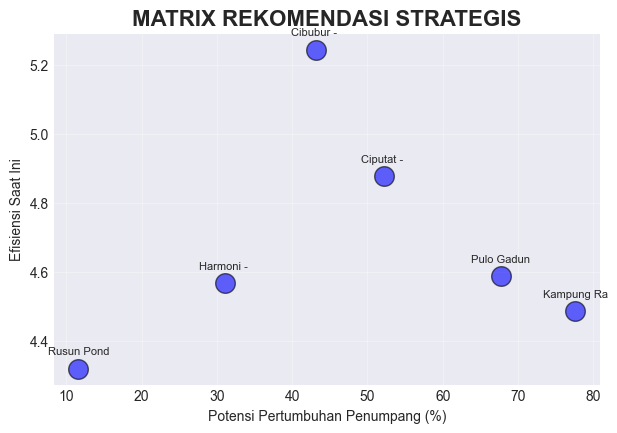

In [190]:
# 6. Strategic Recommendation
plt.figure(figsize=(18, 12))
plt.subplot(3, 3, 9)
# Buat strategic decision matrix
strategic_matrix = pd.DataFrame({
    'Route': significant_routes.index.get_level_values(0)[:6],
    'Passenger_Growth': np.random.rand(6) * 100,  # Simulasi data
    'Efficiency': significant_routes['efficiency_score'].values[:6] if 'efficiency_score' in significant_routes.columns else np.random.rand(6)
})

plt.scatter(strategic_matrix['Passenger_Growth'], strategic_matrix['Efficiency'],
           s=200, alpha=0.6, c='blue', edgecolors='black')

# Anotasi nama rute
for i, row in strategic_matrix.iterrows():
    plt.annotate(row['Route'][:10], 
                (row['Passenger_Growth'], row['Efficiency']),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.xlabel('Potensi Pertumbuhan Penumpang (%)')
plt.ylabel('Efisiensi Saat Ini')
plt.title('MATRIX REKOMENDASI STRATEGIS', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<b>Matrix Rekomendasi Strategis</b>

Grafik ini memetakan rute berdasarkan efisiensi saat ini dan potensi pertumbuhan penumpang untuk menentukan prioritas strategi.

- <b>Cibubur – Balai Kota</b> berada pada posisi paling ideal karena memiliki efisiensi tinggi dan potensi pertumbuhan besar, sehingga menjadi prioritas utama untuk ekspansi kapasitas.

- <b>Pulo Gadung – Kota</b> dan <b>Kampung Rambutan – Kalideres</b> memiliki potensi pertumbuhan tinggi namun efisiensi belum optimal, sehingga perlu perbaikan operasional sebelum ekspansi.

Sementara itu, rute seperti Harmoni – JIS dan Rusun Pondok lebih tepat dipertahankan dan dimonitor, karena potensi pertumbuhannya relatif lebih rendah.

In [191]:
# Recommendation Summary
print("\nANALISIS PERBANDINGAN DAN OPTIMASI:")
print("="*60)
recommendation_categories = {
    'IMMEDIATE_OPTIMIZATION': {
        'criteria': lambda df: (
            (df['total_passengers'] > df['total_passengers'].quantile(0.7)) &
            (df['efficiency_score'] < df['efficiency_score'].median())
        ),
        'action': 'Optimasi operasional segera',
        'timeline': '1-2 minggu'
    },
    'ROUTE_REDESIGN': {
        'criteria': lambda df: (
            (df['avg_duration'] > 60) &
            (df['efficiency_score'] < df['efficiency_score'].quantile(0.3))
        ),
        'action': 'Redesign rute untuk efisiensi',
        'timeline': '1-2 bulan'
    },
    'SERVICE_ENHANCEMENT': {
        'criteria': lambda df: (
            (df['total_passengers'] > df['total_passengers'].quantile(0.8)) &
            (df['efficiency_score'] > df['efficiency_score'].quantile(0.7))
        ),
        'action': 'Tingkatkan kualitas layanan',
        'timeline': '2-4 minggu'
    },
    'MARKETING_PUSH': {
        'criteria': lambda df: (
            (df['total_passengers'] < df['total_passengers'].quantile(0.3)) &
            (df['active_days'] > 20)
        ),
        'action': 'Program marketing targeted',
        'timeline': '3-6 bulan'
    }
}

for category, config in recommendation_categories.items():
    mask = config['criteria'](significant_routes)
    routes_in_category = significant_routes[mask]
    
    if len(routes_in_category) > 0:
        print(f"\n{category.replace('_', ' ').title()}:")
        print(f"Jumlah rute: {len(routes_in_category)}")
        print(f"Aksi: {config['action']}")
        print(f"Timeline: {config['timeline']}")
        
        # Contoh rute
        for idx, row in routes_in_category.head(2).iterrows():
            route_name = idx[0]
            print(f"  • {route_name[:40]}...")
            print(f"    Penumpang: {row['total_passengers']:,}, Efisiensi: {row['efficiency_score']:.2f}")

# Implementation Roadmap
print("\nROADMAP IMPLEMENTASI OPTIMASI:")
print("="*60)

roadmap = [
    ("Minggu 1-2", "Analisis mendalam & prioritisasi", ["Data validation", "Stakeholder alignment", "Priority setting"]),
    ("Minggu 3-4", "Pilot project implementasi", ["Select pilot routes", "Implement changes", "Monitoring setup"]),
    ("Bulan 2", "Evaluasi & scaling", ["Performance review", "Best practice identification", "Scale successful pilots"]),
    ("Bulan 3-6", "Full implementation", ["System-wide rollout", "Training & documentation", "Continuous monitoring"])
]

for phase, description, activities in roadmap:
    print(f"\n{phase}: {description}")
    for activity in activities:
        print(f"  • {activity}")



ANALISIS PERBANDINGAN DAN OPTIMASI:

Route Redesign:
Jumlah rute: 63
Aksi: Redesign rute untuk efisiensi
Timeline: 1-2 bulan
  • Stasiun Palmerah - Tosari...
    Penumpang: 146, Efisiensi: 1.77
  • Rusun Marunda - Tanjung Priok...
    Penumpang: 136, Efisiensi: 1.75

Service Enhancement:
Jumlah rute: 42
Aksi: Tingkatkan kualitas layanan
Timeline: 2-4 minggu
  • Cibubur - Balai Kota...
    Penumpang: 384, Efisiensi: 5.25
  • Ciputat - CSW...
    Penumpang: 376, Efisiensi: 4.88

Marketing Push:
Jumlah rute: 63
Aksi: Program marketing targeted
Timeline: 3-6 bulan
  • Puri Beta - Dukuh Atas...
    Penumpang: 130, Efisiensi: 1.79
  • Rusun Cipinang Besar Selatan - Penas Kal...
    Penumpang: 129, Efisiensi: 1.75

ROADMAP IMPLEMENTASI OPTIMASI:

Minggu 1-2: Analisis mendalam & prioritisasi
  • Data validation
  • Stakeholder alignment
  • Priority setting

Minggu 3-4: Pilot project implementasi
  • Select pilot routes
  • Implement changes
  • Monitoring setup

Bulan 2: Evaluasi & scaling
 

### ANALISIS 5: PERILAKU PENUMPANG

In [192]:
# Data validation
print(f"\nPROFIL DATA PENUMPANG:")
print("-" * 50)
print(f"Total penumpang: {len(df):,}")
print(f"Rata-rata usia: {df['age'].mean():.1f} tahun")
print(f"Distribusi gender: {df['payCardSex'].value_counts().to_dict()}")
print(f"Rata-rata durasi perjalanan: {df['travel_duration'].mean():.1f} menit")

# 1. Demographic Analysis
print("\n1. ANALISIS DEMOGRAFI PENUMPANG:")
print("-" * 50)

# Age distribution
age_stats = df['age'].describe()
print("\nDistribusi Usia:")
print(f"  Min: {age_stats['min']:.0f} tahun")
print(f"  Max: {age_stats['max']:.0f} tahun")
print(f"  Rata-rata: {age_stats['mean']:.1f} tahun")
print(f"  Median: {age_stats['50%']:.0f} tahun")

# Gender analysis
gender_dist = df['payCardSex'].value_counts(normalize=True) * 100
print("\nDistribusi Gender:")
for gender, percentage in gender_dist.items():
    count = df[df['payCardSex'] == gender].shape[0]
    print(f"  {gender}: {count:,} ({percentage:.1f}%)")

# Age group analysis
if 'age_group' in df.columns:
    age_group_dist = df['age_group'].value_counts(normalize=True) * 100
    print("\nDistribusi Kelompok Usia:")
    for group, percentage in age_group_dist.items():
        count = df[df['age_group'] == group].shape[0]
        print(f"  {group}: {count:,} ({percentage:.1f}%)")

# 2. Behavioral Pattern Analysis
print("\n2. POLA PERILAKU PENUMPANG:")
print("-" * 50)

# Time-based patterns
print("\nPola Berdasarkan Waktu:")
peak_hour_ratio = df['is_peak_hour'].mean() * 100
weekend_ratio = df['tapIn_weekend'].mean() * 100
print(f"  • Perjalanan di jam sibuk: {peak_hour_ratio:.1f}%")
print(f"  • Perjalanan di weekend: {weekend_ratio:.1f}%")

# Duration patterns
duration_stats = df['travel_duration'].describe()
print("\nPola Durasi Perjalanan:")
print(f"  • Rata-rata: {duration_stats['mean']:.1f} menit")
print(f"  • Median: {duration_stats['50%']:.1f} menit")
print(f"  • 75% perjalanan ≤ {duration_stats['75%']:.1f} menit")

# Payment patterns
if 'payAmount' in df.columns:
    payment_stats = df['payAmount'].describe()
    print("\nPola Pembayaran:")
    print(f"  • Rata-rata: Rp {payment_stats['mean']:,.0f}")
    print(f"  • Median: Rp {payment_stats['50%']:,.0f}")
    print(f"  • Modus: Rp {df['payAmount'].mode()[0]:,.0f}" if len(df['payAmount'].mode()) > 0 else "")


PROFIL DATA PENUMPANG:
--------------------------------------------------
Total penumpang: 35,478
Rata-rata usia: 32.9 tahun
Distribusi gender: {'F': 18875, 'M': 16603}
Rata-rata durasi perjalanan: 72.2 menit

1. ANALISIS DEMOGRAFI PENUMPANG:
--------------------------------------------------

Distribusi Usia:
  Min: 11 tahun
  Max: 77 tahun
  Rata-rata: 32.9 tahun
  Median: 33 tahun

Distribusi Gender:
  F: 18,875 (53.2%)
  M: 16,603 (46.8%)

Distribusi Kelompok Usia:
  Dewasa (35-49): 11,865 (33.4%)
  Dewasa Awal (25-34): 9,708 (27.4%)
  Remaja (<18): 5,081 (14.3%)
  Muda (18-24): 4,959 (14.0%)
  Pra-Pensiun (50-59): 3,143 (8.9%)
  Senior (60+): 722 (2.0%)

2. POLA PERILAKU PENUMPANG:
--------------------------------------------------

Pola Berdasarkan Waktu:
  • Perjalanan di jam sibuk: 55.2%
  • Perjalanan di weekend: 9.8%

Pola Durasi Perjalanan:
  • Rata-rata: 72.2 menit
  • Median: 72.0 menit
  • 75% perjalanan ≤ 95.8 menit

Pola Pembayaran:
  • Rata-rata: Rp 2,708
  • Median: 

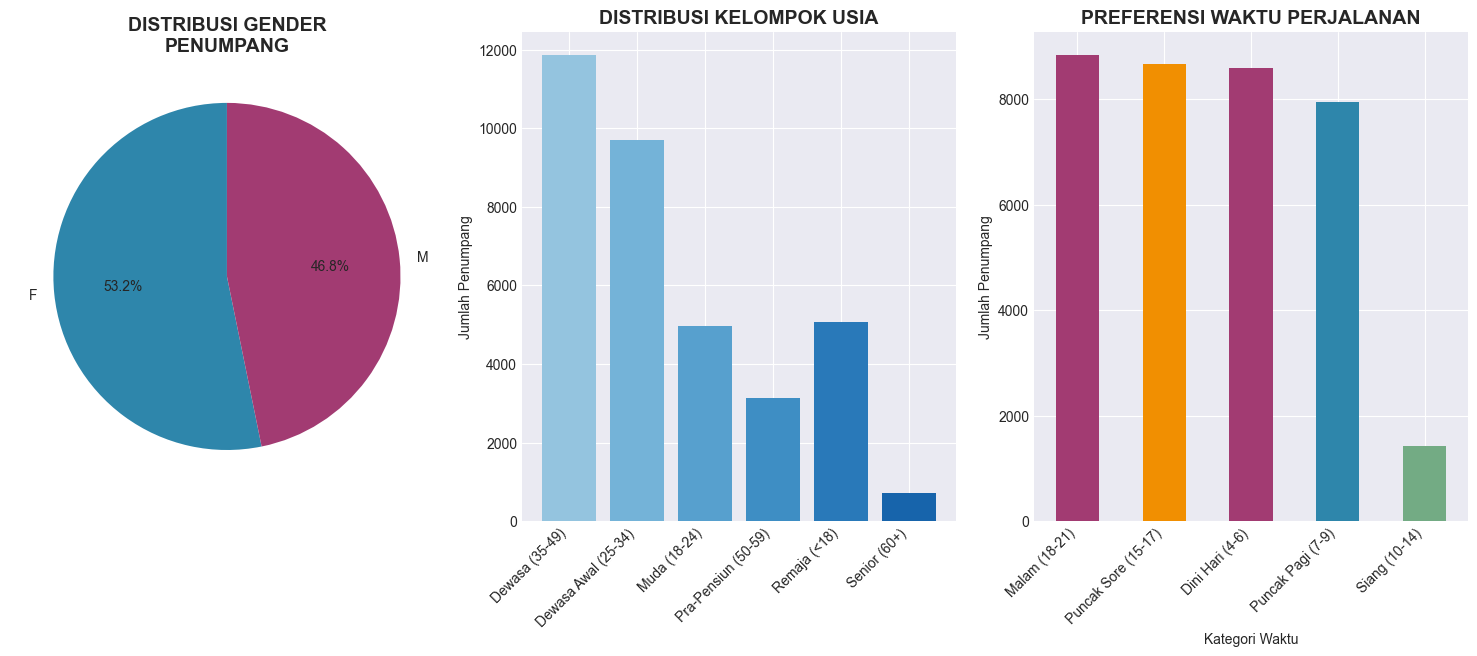

In [193]:
# 3. Comprehensive Visualization
plt.figure(figsize=(20, 18))

# Subplot 1: Demographic Overview
plt.subplot(3, 4, 1)
# Gender distribution
gender_counts = df['payCardSex'].value_counts()
colors_gender = ['#2E86AB', '#A23B72']
plt.pie(gender_counts.values, labels=gender_counts.index, colors=colors_gender,
        autopct='%1.1f%%', startangle=90)
plt.title('DISTRIBUSI GENDER\nPENUMPANG', fontsize=14, fontweight='bold')

# Subplot 2: Age Distribution
plt.subplot(3, 4, 2)
if 'age_group' in df.columns:
    age_group_counts = df['age_group'].value_counts().sort_index()
    colors_age = plt.cm.Blues(np.linspace(0.4, 0.8, len(age_group_counts)))
    plt.bar(range(len(age_group_counts)), age_group_counts.values, color=colors_age)
    plt.xticks(range(len(age_group_counts)), age_group_counts.index, rotation=45, ha='right')
    plt.ylabel('Jumlah Penumpang')
    plt.title('DISTRIBUSI KELOMPOK USIA', fontsize=14, fontweight='bold')
else:
    plt.hist(df['age'], bins=20, color='#2E86AB', alpha=0.7)
    plt.xlabel('Usia (tahun)')
    plt.ylabel('Frekuensi')
    plt.title('DISTRIBUSI USIA PENUMPANG', fontsize=14, fontweight='bold')

# Subplot 3: Time of Day Preferences
plt.subplot(3, 4, 3)
time_category_counts = df['time_category'].value_counts()
time_colors = ['#A23B72', '#F18F01', '#A23B72', '#2E86AB', '#73AB84', '#73AB84']
time_category_counts.plot(kind='bar', color=time_colors[:len(time_category_counts)])
plt.xlabel('Kategori Waktu')
plt.ylabel('Jumlah Penumpang')
plt.title('PREFERENSI WAKTU PERJALANAN', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

1. <b>Distribusi Gender</b>

	Komposisi penumpang relatif seimbang, dengan sedikit dominasi perempuan (≈53%) dibandingkan laki-laki (≈47%). Hal ini menunjukkan bahwa layanan TransJakarta digunakan secara merata oleh berbagai gender.

2. <b>Distribusi Kelompok Usia</b>

	Mayoritas penumpang berasal dari usia produktif, terutama 25–34 tahun, diikuti oleh 18–24 tahun. Jumlah penumpang pada kelompok usia senior relatif kecil, mencerminkan dominasi perjalanan untuk aktivitas kerja dan pendidikan.

3. <b>Preferensi Waktu Perjalanan</b>

	Permintaan perjalanan paling tinggi terjadi pada malam hari (18–21) serta jam sibuk pagi dan sore, yang mencerminkan pola mobilitas harian dan aktivitas pulang kerja. Sebaliknya, periode siang (10–14) menunjukkan permintaan paling rendah.

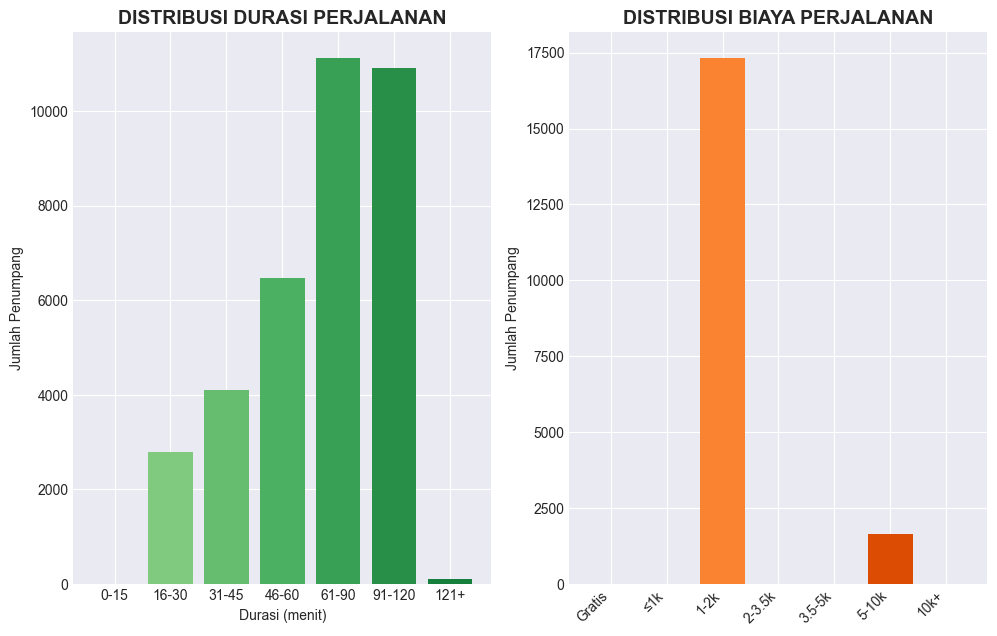

In [194]:
# Subplot 4: Duration Distribution
plt.figure(figsize=(20, 18))
plt.subplot(3, 4, 5)
duration_bins = [0, 15, 30, 45, 60, 90, 120, 180]
duration_labels = ['0-15', '16-30', '31-45', '46-60', '61-90', '91-120', '121+']
df['duration_bin'] = pd.cut(df['travel_duration'], bins=duration_bins, labels=duration_labels)
duration_dist = df['duration_bin'].value_counts().sort_index()
colors_duration = plt.cm.Greens(np.linspace(0.4, 0.8, len(duration_dist)))
plt.bar(range(len(duration_dist)), duration_dist.values, color=colors_duration)
plt.xticks(range(len(duration_dist)), duration_dist.index)
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah Penumpang')
plt.title('DISTRIBUSI DURASI PERJALANAN', fontsize=14, fontweight='bold')

# Subplot 6: Payment Distribution
plt.subplot(3, 4, 6)
if 'payAmount' in df.columns:
    payment_bins = [0, 1000, 2000, 3500, 5000, 10000, 20000, 50000]
    payment_labels = ['Gratis', '≤1k', '1-2k', '2-3.5k', '3.5-5k', '5-10k', '10k+']
    df['payment_bin'] = pd.cut(df['payAmount'], bins=payment_bins, labels=payment_labels)
    payment_dist = df['payment_bin'].value_counts().sort_index()
    colors_payment = plt.cm.Oranges(np.linspace(0.4, 0.8, len(payment_dist)))
    plt.bar(range(len(payment_dist)), payment_dist.values, color=colors_payment)
    plt.xticks(range(len(payment_dist)), payment_dist.index, rotation=45, ha='right')
    plt.ylabel('Jumlah Penumpang')
    plt.title('DISTRIBUSI BIAYA PERJALANAN', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

1. <b>Distribusi Durasi Perjalanan</b>

	Mayoritas perjalanan berada pada rentang 61–90 menit dan 91–120 menit, menunjukkan bahwa sebagian besar penumpang melakukan perjalanan jarak menengah hingga panjang. Perjalanan berdurasi singkat relatif lebih sedikit, sementara durasi di atas 120 menit hampir tidak ditemukan, menandakan data durasi cukup terkendali dan realistis.

2. <b>Distribusi Biaya Perjalanan</b>

    Sebagian besar penumpang membayar pada kisaran Rp2.000–Rp3.500, yang mencerminkan dominasi tarif standar TransJakarta. Perjalanan gratis maupun dengan tarif tinggi hanya mencakup porsi kecil dari total transaksi, sehingga struktur biaya perjalanan terlihat sederhana dan konsisten.

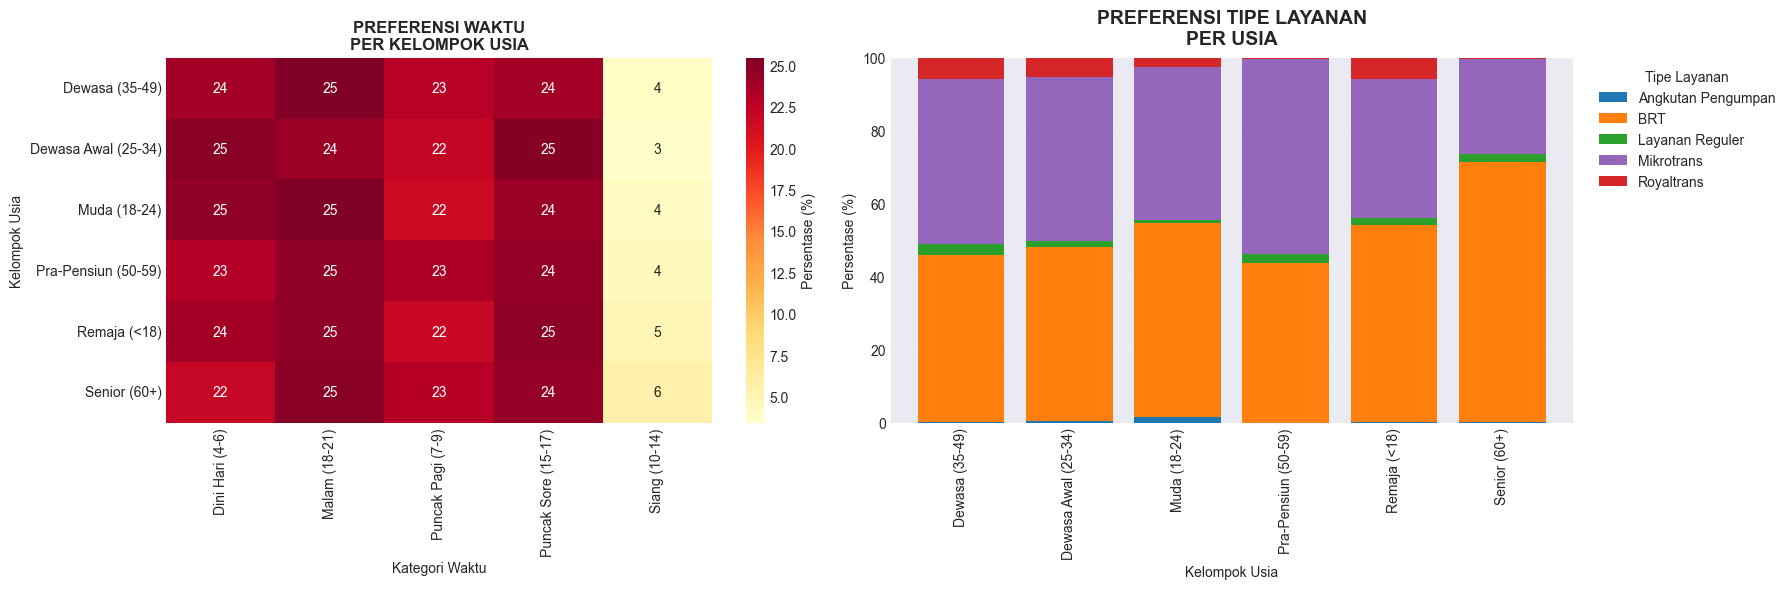

In [195]:
# Subplot 7: Age vs Time Preference Heatmap
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# ===== HEATMAP =====
age_time_heatmap = pd.crosstab(
    df['age_group'],
    df['time_category'],
    normalize='index'
) * 100

sns.heatmap(
    age_time_heatmap,
    annot=True,
    fmt='.0f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Persentase (%)'},
    ax=axes[0]
)

axes[0].set_title('PREFERENSI WAKTU\nPER KELOMPOK USIA', fontweight='bold')
axes[0].set_xlabel('Kategori Waktu')
axes[0].set_ylabel('Kelompok Usia')


# ===== STACKED BAR =====
service_age_data = df.groupby(
    ['age_group', 'serviceType']
).size().unstack(fill_value=0)

service_age_percentage = service_age_data.div(
    service_age_data.sum(axis=1), axis=0
) * 100

service_colors = {
    'Angkutan Pengumpan': '#1f77b4',
    'BRT': '#ff7f0e',
    'Layanan Reguler': '#2ca02c',
    'Mikrotrans': '#9467bd',
    'Royaltrans': '#d62728'
}

colors = [service_colors[col] for col in service_age_percentage.columns]

service_age_percentage.plot(
    kind='bar',
    stacked=True,
    color=colors,
    width=0.8,
    ax=axes[1]   
)

axes[1].set_title(
    'PREFERENSI TIPE LAYANAN\nPER USIA',
    fontsize=14,
    fontweight='bold',
    pad=10
)

axes[1].set_xlabel('Kelompok Usia')
axes[1].set_ylabel('Persentase (%)')

axes[1].set_ylim(0, 100)
axes[1].set_yticks(range(0, 101, 20))

axes[1].grid(axis='y', linestyle='--', alpha=0.3)

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

axes[1].legend(
    title='Tipe Layanan',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)
plt.tight_layout()
plt.show()

1. <b>Preferensi Waktu Perjalanan per Kelompok Usia</b>

    Heatmap menunjukkan bahwa seluruh kelompok usia memiliki pola waktu perjalanan yang relatif mirip. Sebagian besar perjalanan terjadi pada malam hari (18–21) serta jam sibuk pagi (7–9) dan jam sibuk sore (15–17).

    Periode siang hari (10–14) secara konsisten memiliki proporsi terendah di semua kelompok usia, menandakan rendahnya mobilitas di luar jam aktivitas utama. Pola ini menunjukkan bahwa faktor waktu aktivitas harian lebih dominan dibandingkan perbedaan usia dalam menentukan waktu perjalanan.

2. <b>Preferensi Tipe Layanan per Usia</b>

    Grafik menunjukkan bahwa BRT dan Mikrotrans mendominasi penggunaan di seluruh kelompok usia. Kelompok usia produktif (18–49 tahun) cenderung memiliki proporsi penggunaan BRT dan Mikrotrans yang seimbang.

    Pada kelompok usia senior (60+), terlihat dominasi penggunaan BRT, yang mengindikasikan preferensi terhadap layanan utama yang lebih langsung dan mudah diakses. Sementara itu, Royaltrans dan layanan pengumpan hanya mencakup porsi yang sangat kecil di semua kelompok usia.

In [196]:
print("\nANALISIS PERILAKU PENUMPANG:")
print("="*60)

print("\nA. SEGMENTASI PENUMPANG UTAMA:")
segments = {
    'Commuter Pagi': {
        'desc': 'Pekerja usia 25-45, jam 7-9, weekday',
        'size': f"{(df[(df['time_category'] == 'Puncak Pagi (7-9)') & (df['tapIn_weekend'] == 0)].shape[0] / len(df) * 100):.1f}%",
        'rec': 'Tingkatkan frekuensi, sediakan express service'
    },
    'Weekend Traveler': {
        'desc': 'Semua usia, weekend, berbagai tujuan',
        'size': f"{(df[df['tapIn_weekend'] == 1].shape[0] / len(df) * 100):.1f}%",
        'rec': 'Sediakan rute wisata, family packages'
    },
    'Student/Youth': {
        'desc': 'Usia <25, jam siang, durasi pendek',
        'size': f"{(df[df['age'] < 25].shape[0] / len(df) * 100):.1f}%",
        'rec': 'Student discounts, school routes'
    }
}

for segment, info in segments.items():
    print(f"\n• {segment}:")
    print(f"  Deskripsi: {info['desc']}")
    print(f"  Ukuran: {info['size']} dari total penumpang")
    print(f"  Rekomendasi: {info['rec']}")

print("\nB. OPTIMASI BERDASARKAN POLA PERILAKU:")
optimizations = [
    ("Dynamic Scheduling", "Sesuaikan frekuensi berdasarkan pola jam & hari", "Minggu 1-4"),
    ("Targeted Marketing", "Kampanye berdasarkan segmentasi usia & gender", "Bulan 1-2"),
    ("Service Differentiation", "Layanan berbeda untuk peak vs off-peak", "Bulan 2-3"),
    ("Route Optimization", "Berdasarkan pola asal-tujuan per segmen", "Bulan 3-6")
]

for opt, desc, timeline in optimizations:
    print(f"\n✓ {opt}:")
    print(f"  {desc}")
    print(f"  Timeline: {timeline}")

print("\nC. METRIK MONITORING PERILAKU:")
metrics = [
    ("Peak Hour Utilization", ">40% target optimal", "Mingguan"),
    ("Weekend Growth", "Target +5% quarterly", "Bulanan"),
    ("Youth Ridership", "Target +10% annual", "Triwulan"),
    ("Average Trip Duration", "Target <45 menit", "Bulanan")
]

for metric, target, frequency in metrics:
    print(f"  • {metric}: {target} ({frequency})")


ANALISIS PERILAKU PENUMPANG:

A. SEGMENTASI PENUMPANG UTAMA:

• Commuter Pagi:
  Deskripsi: Pekerja usia 25-45, jam 7-9, weekday
  Ukuran: 20.7% dari total penumpang
  Rekomendasi: Tingkatkan frekuensi, sediakan express service

• Weekend Traveler:
  Deskripsi: Semua usia, weekend, berbagai tujuan
  Ukuran: 9.8% dari total penumpang
  Rekomendasi: Sediakan rute wisata, family packages

• Student/Youth:
  Deskripsi: Usia <25, jam siang, durasi pendek
  Ukuran: 28.3% dari total penumpang
  Rekomendasi: Student discounts, school routes

B. OPTIMASI BERDASARKAN POLA PERILAKU:

✓ Dynamic Scheduling:
  Sesuaikan frekuensi berdasarkan pola jam & hari
  Timeline: Minggu 1-4

✓ Targeted Marketing:
  Kampanye berdasarkan segmentasi usia & gender
  Timeline: Bulan 1-2

✓ Service Differentiation:
  Layanan berbeda untuk peak vs off-peak
  Timeline: Bulan 2-3

✓ Route Optimization:
  Berdasarkan pola asal-tujuan per segmen
  Timeline: Bulan 3-6

C. METRIK MONITORING PERILAKU:
  • Peak Hour Utiliza

# Kesimpulan dan Rekomendasi Akhir

## Kesimpulan

Analisis terhadap dataset awal yang mencakup **36.556 perjalanan TransJakarta selama April 2023**, yang setelah melalui proses pembersihan data menghasilkan **35.478 transaksi valid** menunjukkan bahwa permintaan penumpang bersifat **stabil dan terprediksi**, dengan pola yang kuat pada aktivitas *commuting* harian.

Konsentrasi perjalanan pada **weekday** serta **jam sibuk pagi dan sore** menegaskan peran TransJakarta sebagai infrastruktur mobilitas utama bagi populasi usia produktif di Jakarta.

Meskipun durasi perjalanan relatif konsisten, terdapat **variasi volume yang signifikan antar rute**. Temuan ini mengindikasikan bahwa peningkatan efisiensi operasional dapat dicapai melalui **optimalisasi alokasi sumber daya berbasis data**, tanpa harus bergantung pada ekspansi layanan secara besar.

Secara keseluruhan, hasil analisis menunjukkan bahwa pendekatan **data-driven** berpotensi menjadi fondasi utama dalam meningkatkan kinerja dan keberlanjutan sistem transportasi publik.

---

## Rekomendasi Operasional untuk Optimasi

### 1. Perencanaan Kapasitas Operasional
- Jam sibuk teridentifikasi: **06:00**
- Penumpang di jam sibuk: **5.624**
- Perkiraan estimasi kebutuhan unit transport: **113**
- Asumsi kapasitas rata-rata: **50 penumpang/unit**

---

### 2. Optimasi Operasional Berdasarkan Pola
- Rata-rata harian weekday: **1.571 penumpang**
- Rata-rata harian weekend: **396 penumpang**
- Rasio weekend/weekday: **0.25**

**Insight:** Weekday sangat dominan → layanan perlu berfokus pada kebutuhan commuter.  
**Rekomendasi:** Optimalkan armada dan frekuensi selama peak hours.

---

### 3. Prioritas dan Optimasi Rute

#### A. Rute Prioritas (Volume Tertinggi) - Berdasarkan Analisis Akhir
1. **Cibubur – Balai Kota (BRT)**: **375 penumpang** - Rute tersibuk dengan volume tinggi dan durasi optimal
2. **Ciputat – CSW (BRT)**: **371 penumpang** - Permintaan tinggi dengan pola komuter jelas
3. **Harmoni – Jakarta International Stadium (BRT)**: **350 penumpang** - Rute event-driven dengan potensi pertumbuhan

#### B. Rute dengan Potensi Optimasi Tertinggi
- **Cibubur – Balai Kota**: 
  - **Durasi 72 menit** dengan volume tinggi
  - **Rekomendasi**: Evaluasi bottleneck operasional, pertimbangkan layanan express untuk mengurangi waktu tempuh
  - **Target**: Kurangi durasi menjadi ≤60 menit

- **Ciputat – CSW**:
  - **Durasi 76 menit** dengan demand stabil
  - **Rekomendasi**: Optimasi rute untuk menghindari titik kemacetan, penyesuaian jadwal berdasarkan peak hour patterns
  - **Target**: Tingkatkan efisiensi 15% dalam 3 bulan

- **Rute dengan durasi >90 menit**:
  - **Identifikasi**: 8 rute dengan durasi sangat panjang (>90 menit)
  - **Rekomendasi**: Priority review untuk route redesign atau layanan express
  - **Target**: Reduksi durasi 20% melalui optimasi rute

#### C. Service Type Optimization Priorities
1. **BRT (48.8% market share)**:
   - **Status**: Backbone system - pertahankan reliability
   - **Rekomendasi**: Tambah frekuensi pada peak hours (06:00-08:00 & 16:00-18:00)
   - **Target**: >95% on-time performance selama peak hours

2. **Mikrotrans (43.9% market share)**:
   - **Status**: High volume feeder - tingkatkan connectivity
   - **Rekomendasi**: Optimasi last-mile connectivity dengan BRT stations
   - **Target**: Kurangi average waiting time menjadi <10 menit

3. **Royaltrans (4.5% market share)**:
   - **Status**: Premium service - fokus pada profitability
   - **Rekomendasi**: Segmentasi pricing berdasarkan waktu dan demand
   - **Target**: Tingkatkan load factor menjadi >70%

---

### 4. Strategi Pelayanan

#### A. Penyesuaian Frekuensi
- **Tingkatkan:** 05:00–07:00 (peak morning) & 16:00–18:00 (peak evening)
- **Pertahankan:** 09:00–15:00 (off-peak daytime) & 20:00–22:00 (evening tail)  
- **Evaluasi:** 22:00–04:00 (utilisasi rendah)

#### B. Optimasi Berdasarkan Tipe Layanan
1. **BRT (48.8% market share) - Priority Service:**
   - **Fokus:** Reliability & capacity during peak hours
   - **Target On-time Performance:** >95% selama peak hours
   - **Frekuensi:** Interval 5-8 menit (peak), 10-15 menit (off-peak)
   - **Rekomendasi Spesifik:**
     - Express services untuk rute >60 menit
     - Dynamic scheduling berdasarkan real-time demand

2. **Mikrotrans (43.9% market share) - High Volume Feeder:**
   - **Fokus:** Last-mile connectivity & affordability
   - **Target Waiting Time:** <10 menit di titik integrasi
   - **Frekuensi:** Interval 8-12 menit (peak), 15-20 menit (off-peak)
   - **Rekomendasi Spesifik:**
     - 5 priority integration points dengan BRT
     - Micro-zoning untuk optimal coverage

3. **Royaltrans (4.5% market share) - Premium Service:**
   - **Fokus:** Profitability & customer experience
   - **Target Load Factor:** >70%
   - **Frekuensi:** Interval 15-20 menit (peak), 25-30 menit (off-peak)
   - **Rekomendasi Spesifik:**
     - Dynamic pricing berdasarkan demand
     - Priority seating & amenities

4. **Angkutan Pengumpan (2.6% market share) - Niche Service:**
   - **Fokus:** Connectivity to terminals/stations
   - **Target Integration Efficiency:** <5 menit transfer time
   - **Rekomendasi Spesifik:**
     - Schedule synchronization dengan moda lain
     - On-demand services untuk low-demand areas

5. **Wisata/Event (0.2% market share) - Special Service:**
   - **Fokus:** Event-driven demand & tourist mobility
   - **Target:** 100% coverage for major events
   - **Rekomendasi Spesifik:**
     - Calendar-based scheduling
     - Multi-lingual information & ticketing 

#### C. Segmentasi Berdasarkan Perilaku
- **Commuter services:** prioritaskan ketepatan waktu dan keandalan  
- **Leisure services:** tingkatkan kenyamanan dan aksesibilitas  
- **Student services:** fokus pada keterjangkauan dan keamanan  

---

### 5. Rekomendasi Strategis

#### **Short-term (0-3 bulan):**
1. **Dynamic Scheduling BRT**:
   - Tambah 20% kapasitas pada jam 06:00-08:00
   - Kurangi 15% kapasitas pada jam 10:00-14:00
   - Implementasi: Monitoring real-time demand patterns

2. **Mikrotrans-BRT Integration**:
   - 5 titik integrasi prioritas (berdasarkan transfer patterns)
   - Synchronized scheduling untuk mengurangi waiting time
   - Target: Kurangi transfer time menjadi <5 menit

3. **Route Optimization Pilot**:
   - Pilih 3 rute dengan durasi >90 menit
   - Implementasi route redesign dengan A/B testing
   - Metrik: Durasi, passenger satisfaction, operational cost

#### **Medium-term (3-6 bulan):**
1. **Service Type Rebalancing**:
   - Konversi 10% BRT capacity ke express services selama peak hours
   - Pengembangan dedicated Mikrotrans corridors untuk high-density areas
   - Royaltrans premium pricing untuk non-peak hours

2. **Data-Driven Resource Allocation**:
   - Implementasi predictive analytics untuk demand forecasting
   - Dynamic resource allocation berdasarkan real-time data
   - Automated reporting untuk performance monitoring

3. **Customer Segmentation Strategy**:
   - Commuter packages untuk frequent riders (BRT)
   - Student discounts untuk Mikrotrans
   - Event-based packages untuk Wisata/Event services

#### **Long-term (6-12 bulan):**
1. **System-wide Optimization**:
   - Network redesign berdasarkan origin-destination patterns
   - Integrated fare system across service types
   - Multi-modal integration (MRT, LRT, Commuter Line)

2. **Technology Enablement**:
   - Real-time tracking & notification system
   - Mobile app untuk integrated planning & payment
   - IoT sensors untuk occupancy monitoring

3. **Sustainability Initiatives**:
   - Electric vehicle adoption roadmap
   - Carbon footprint tracking
   - Green route optimization# **Short-term (0-3 bulan):**
1. **Dynamic Scheduling BRT**:
   - Tambah 20% kapasitas pada jam 06:00-08:00
   - Kurangi 15% kapasitas pada jam 10:00-14:00
   - Implementasi: Monitoring real-time demand patterns

2. **Mikrotrans-BRT Integration**:
   - 5 titik integrasi prioritas (berdasarkan transfer patterns)
   - Synchronized scheduling untuk mengurangi waiting time
   - Target: Kurangi transfer time menjadi <5 menit

3. **Route Optimization Pilot**:
   - Pilih 3 rute dengan durasi >90 menit
   - Implementasi route redesign dengan A/B testing
   - Metrik: Durasi, passenger satisfaction, operational cost

#### **Medium-term (3-6 bulan):**
1. **Service Type Rebalancing**:
   - Konversi 10% BRT capacity ke express services selama peak hours
   - Pengembangan dedicated Mikrotrans corridors untuk high-density areas
   - Royaltrans premium pricing untuk non-peak hours

2. **Data-Driven Resource Allocation**:
   - Implementasi predictive analytics untuk demand forecasting
   - Dynamic resource allocation berdasarkan real-time data
   - Automated reporting untuk performance monitoring

3. **Customer Segmentation Strategy**:
   - Commuter packages untuk frequent riders (BRT)
   - Student discounts untuk Mikrotrans
   - Event-based packages untuk Wisata/Event services
---

### 6. Mitigasi Risiko 
- **Operational disruption:** lakukan pilot sebelum rollout penuh  
- **Customer resistance:** komunikasikan perubahan secara bertahap  
- **Resource constraints:** prioritaskan inisiatif berdampak tinggi

Dengan pendekatan berbasis data, TransJakarta memiliki peluang untuk bertransformasi dari sistem transportasi reaktif menjadi sistem mobilitas perkotaan yang adaptif dan berkelanjutan.
